<center>
    <img src='https://github.com/vopani/fortyone/blob/main/images/logo_name_light_450_x_150.png?raw=true' align='center'>
    <br>
    Machine Learning begins with Human Learning
</center>

<center>
    <a href='https://github.com/vopani/fortyone/blob/master/LICENSE'>
        <img src='https://img.shields.io/badge/license-Apache%202.0-blue.svg?logo=apache' align='center'>
    </a>
    <a href='https://github.com/vopani/fortyone'>
        <img src='https://img.shields.io/github/stars/vopani/fortyone?color=yellowgreen&logo=github' align='center'>
    </a>
    <a href='https://twitter.com/vopani'>
        <img src='https://img.shields.io/twitter/follow/vopani' align='center'>
    </a>
</center>
<br>
<center>
    <a href='https://colab.research.google.com/github/vopani/fortyone/blob/main/notebooks/automl/tabular/H2O%20AutoML.ipynb'>
        <img src='https://colab.research.google.com/assets/colab-badge.svg' align='center'>
    </a>
    <a href='https://www.kaggle.com/rohanrao/fortyone-h2o-automl'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20Kaggle&labelColor=grey&color=blue&logo=kaggle' align='center'>
    </a>
    <a href='https://github.com/vopani/fortyone/blob/main/notebooks/automl/tabular/H2O%20AutoML.ipynb'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20GitHub&labelColor=grey&color=blue&logo=github' align='center'>
    </a>
</center>

<center>
    <hr>
    <font size='7'>H2O AutoML</font>
    <br>
    <img src='https://docs.h2o.ai/h2o/latest-stable/h2o-docs/_images/h2o-automl-logo.jpg' width='150px' align='center'>
    <br>
    <a href="https://www.h2o.ai/products/h2o-automl/">H2O AutoML</a> is an automated machine learning library open sourced by <a href="https://h2o.ai">H2O.ai</a>
</center>

## Tutorial Dependencies
In order to get the full experience of this notebook, please install the following dependencies and follow the notebook in order.

* **Scikit-learn** for ML utilities
* **Pandas** for data utilities

In [ ]:
!pip install scikit-learn==0.24.1
!pip install pandas

## 1. Install H2O AutoML
H2O AutoML is part of the `h2o` library that can be installed with pip.

In [ ]:
!pip install h2o

## 2. Upgrade H2O library
If you already have the `h2o` library installed, you can easily upgrade it to the latest version.

In [ ]:
!pip install h2o --upgrade

## 3. Check H2O version
It's important to know the version of `H2O AutoML` you have. It is same as the version of the `h2o` library.

In [4]:
import h2o

print(h2o.__version__)

3.32.1.1


## 4. Intitialize H2O
Before using any functionality of `h2o`, it must first be initialized.

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.1" 2019-04-16; Java(TM) SE Runtime Environment (build 12.0.1+12); Java HotSpot(TM) 64-Bit Server VM (build 12.0.1+12, mixed mode, sharing)
  Starting server from /Users/rohanrao/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmphkok_7kt
  JVM stdout: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmphkok_7kt/h2o_rohanrao_started_from_python.out
  JVM stderr: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmphkok_7kt/h2o_rohanrao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_rohanrao_jyehgk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


## 5. Shutdown H2O
After completing the use of `h2o`, it can be shutdown.

In [6]:
import time

h2o.cluster().shutdown()

time.sleep(2)

H2O session _sid_a802 closed.


## 6. Import H2O AutoML
`H2OAutoML` is the primary class for running AutoML models.

In [7]:
from h2o.automl import H2OAutoML

## 7. Prepare data
`H2OAutoML` requires the input data as `H2O Frames`. Let's use the breast cancer dataset available in sklearn as an example.

In [8]:
import h2o
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)['data']
data['target'] = load_breast_cancer(as_frame=True)['target']

h2o.init()

h2o_train = h2o.H2OFrame(data)
h2o_train

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_rohanrao_jyehgk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0
12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,0
18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0
13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,0
12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075,0


## 8. Run a binary classification
The target variable needs to be a `factor` for AutoML to run a `binary` classifier.   
***P.S.*** *The runtime is limited to 60 seconds and nfolds is set to 0 for faster training*

In [9]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)['data']
data['target'] = load_breast_cancer(as_frame=True)['target']

h2o.init()

h2o_train = h2o.H2OFrame(data)
h2o_train['target'] = h2o_train['target'].asfactor()

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.1" 2019-04-16; Java(TM) SE Runtime Environment (build 12.0.1+12); Java HotSpot(TM) 64-Bit Server VM (build 12.0.1+12, mixed mode, sharing)
  Starting server from /Users/rohanrao/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmp_mc7z161
  JVM stdout: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmp_mc7z161/h2o_rohanrao_started_from_python.out
  JVM stderr: /var/folders/7c/fx0jcn5x2p50wv5070qp1zyr0000gn/T/tmp_mc7z161/h2o_rohanrao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_rohanrao_0hqumk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


## 9. Run multiclass classification
`Multiclass` classification can be run in the same way as binary.

In [10]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_iris

multiclass_data = load_iris(as_frame=True)['data']
multiclass_data['target'] = load_iris(as_frame=True)['target']

h2o.init()

h2o_multiclass_train = h2o.H2OFrame(multiclass_data)
h2o_multiclass_train['target'] = h2o_multiclass_train['target'].asfactor()

h2o_multiclass_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_multiclass_aml.train(y='target', training_frame=h2o_multiclass_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 00 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_rohanrao_0hqumk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.898 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |██████████
17:10:18.386: Skipping training of model GBM_5_AutoML_20210426_171009 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210426_171009.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 114.0.


██████████████████████████████████████████████| 100%


## 10. Run regression
`Regression` can be run using the target variable as numeric.

In [11]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_diabetes

regression_data = load_diabetes(as_frame=True)['data']
regression_data['target'] = load_diabetes(as_frame=True)['target']

h2o.init()

h2o_regression_train = h2o.H2OFrame(regression_data)
h2o_regression_train['target'] = h2o_regression_train['target'].asnumeric()

h2o_regression_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_regression_aml.train(y='target', training_frame=h2o_regression_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 58 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_rohanrao_0hqumk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.843 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


## 11. Check the leaderboard
The AutoML `leaderboard` shows you the various models built alongwith their respective performance.

In [12]:
h2o_aml.leaderboard.head(rows=h2o_aml.leaderboard.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20210426_170911,0.995798,0.139129,0.997364,0.0238095,0.187619,0.0352008
DeepLearning_grid__3_AutoML_20210426_170911_model_1,0.995798,0.0719667,0.997364,0.0238095,0.136879,0.0187359
XGBoost_grid__1_AutoML_20210426_170911_model_88,0.994398,0.117287,0.996431,0.0238095,0.177084,0.0313586
XGBoost_grid__1_AutoML_20210426_170911_model_56,0.994398,0.133451,0.996431,0.0238095,0.183638,0.0337229
GBM_grid__1_AutoML_20210426_170911_model_29,0.994398,0.109776,0.996431,0.0238095,0.177462,0.0314929
XGBoost_grid__1_AutoML_20210426_170911_model_23,0.993697,0.131759,0.995946,0.0238095,0.179595,0.0322544
GBM_grid__1_AutoML_20210426_170911_model_33,0.992997,0.113875,0.995466,0.0238095,0.173742,0.0301863
XGBoost_grid__1_AutoML_20210426_170911_model_104,0.992997,0.14112,0.995626,0.047619,0.191243,0.0365737
XGBoost_grid__1_AutoML_20210426_170911_model_1,0.992997,0.111391,0.995466,0.0238095,0.172274,0.0296785
GBM_grid__1_AutoML_20210426_170911_model_27,0.992997,0.10053,0.995466,0.0238095,0.160482,0.0257544


## 12. Get the best model
The best model is saved as the `leader`.

In [13]:
h2o_aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20210426_170911


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.028984109938771638
RMSE: 0.17024720244036798
LogLoss: 0.12565287374386896
Mean Per-Class Error: 0.02934446505875077
AUC: 0.9904658833230261
AUCPR: 0.9932198474852291
Gini: 0.9809317666460522

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.452072411775589: 


,,0,1,Error,Rate
0,0,156.0,9.0,0.0545,(9.0/165.0)
1,1,2.0,292.0,0.0068,(2.0/294.0)
2,Total,158.0,301.0,0.024,(11.0/459.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.452072,0.981513,99.0
1,max f2,0.452072,0.988490,99.0
2,max f0point5,0.730708,0.978723,78.0
3,max accuracy,0.462131,0.976035,97.0
4,max precision,0.978963,1.000000,0.0
5,max recall,0.291522,1.000000,111.0
6,max specificity,0.978963,1.000000,0.0
7,max absolute_mcc,0.452072,0.948000,99.0
8,max min_per_class_accuracy,0.621074,0.957576,88.0
9,max mean_per_class_accuracy,0.462131,0.970656,97.0



Gains/Lift Table: Avg response rate: 64.05 %, avg score: 64.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.137255,0.978963,1.561224,1.561224,1.000000,0.978963,1.000000,0.978963,0.214286,0.214286,56.122449,56.122449,0.214286
1,2,0.178649,0.976247,1.561224,1.561224,1.000000,0.976247,1.000000,0.978334,0.064626,0.278912,56.122449,56.122449,0.278912
2,3,0.222222,0.973239,1.561224,1.561224,1.000000,0.973239,1.000000,0.977335,0.068027,0.346939,56.122449,56.122449,0.346939
3,4,0.300654,0.967831,1.561224,1.561224,1.000000,0.971381,1.000000,0.975782,0.122449,0.469388,56.122449,56.122449,0.469388
4,5,0.444444,0.952265,1.513915,1.545918,0.969697,0.959338,0.990196,0.970461,0.217687,0.687075,51.391466,54.591837,0.674954
5,6,0.507625,0.935793,1.561224,1.547823,1.000000,0.940306,0.991416,0.966708,0.098639,0.785714,56.122449,54.782342,0.773593
6,7,0.599129,0.765150,1.524052,1.544193,0.976190,0.894301,0.989091,0.955650,0.139456,0.925170,52.405248,54.419295,0.906988
7,8,0.703704,0.285800,0.715561,1.421053,0.458333,0.486600,0.910217,0.885946,0.074830,1.000000,-28.443878,42.105263,0.824242
8,9,0.816993,0.061765,0.000000,1.224000,0.000000,0.108279,0.784000,0.778109,0.000000,1.000000,-100.000000,22.400000,0.509091
9,10,1.000000,0.030963,0.000000,1.000000,0.000000,0.034275,0.640523,0.641983,0.000000,1.000000,-100.000000,0.000000,0.000000




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.03819647238893105
RMSE: 0.1954391782343833
LogLoss: 0.14613940282097893
Mean Per-Class Error: 0.034482758620689724
AUC: 0.9920424403183024
AUCPR: 0.9933236012616307
Gini: 0.9840848806366047

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8159929513931274: 


,,0,1,Error,Rate
0,0,26.0,0.0,0.0,(0.0/26.0)
1,1,2.0,27.0,0.069,(2.0/29.0)
2,Total,28.0,27.0,0.0364,(2.0/55.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.815993,0.964286,21.0
1,max f2,0.478917,0.979730,26.0
2,max f0point5,0.815993,0.985401,21.0
3,max accuracy,0.815993,0.963636,21.0
4,max precision,0.978963,1.000000,0.0
5,max recall,0.478917,1.000000,26.0
6,max specificity,0.978963,1.000000,0.0
7,max absolute_mcc,0.815993,0.929802,21.0
8,max min_per_class_accuracy,0.815993,0.931034,21.0
9,max mean_per_class_accuracy,0.815993,0.965517,21.0



Gains/Lift Table: Avg response rate: 52.73 %, avg score: 55.27 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.036364,0.978963,1.896552,1.896552,1.000000,0.978963,1.000000,0.978963,0.068966,0.068966,89.655172,89.655172,0.068966
1,2,0.036364,0.978745,0.000000,1.896552,0.000000,0.000000,1.000000,0.978963,0.000000,0.068966,-100.000000,89.655172,0.068966
2,3,0.036364,0.977279,0.000000,1.896552,0.000000,0.000000,1.000000,0.978963,0.000000,0.068966,-100.000000,89.655172,0.068966
3,4,0.072727,0.976247,1.896552,1.896552,1.000000,0.976247,1.000000,0.977605,0.068966,0.137931,89.655172,89.655172,0.137931
4,5,0.109091,0.973212,1.896552,1.896552,1.000000,0.973239,1.000000,0.976150,0.068966,0.206897,89.655172,89.655172,0.206897
5,6,0.163636,0.971071,1.896552,1.896552,1.000000,0.972008,1.000000,0.974769,0.103448,0.310345,89.655172,89.655172,0.310345
6,7,0.218182,0.967771,1.896552,1.896552,1.000000,0.967804,1.000000,0.973028,0.103448,0.413793,89.655172,89.655172,0.413793
7,8,0.309091,0.951380,1.896552,1.896552,1.000000,0.960176,1.000000,0.969248,0.172414,0.586207,89.655172,89.655172,0.586207
8,9,0.400000,0.927692,1.896552,1.896552,1.000000,0.939344,1.000000,0.962452,0.172414,0.758621,89.655172,89.655172,0.758621
9,10,0.509091,0.690200,1.580460,1.828818,0.833333,0.837416,0.964286,0.935658,0.172414,0.931034,58.045977,82.881773,0.892573




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-04-26 17:09:12,0.002 sec,0.0,0.500000,0.693147,0.500000,0.640523,1.000000,0.359477,0.500000,0.693147,0.500000,0.527273,1.000000,0.472727
1,,2021-04-26 17:09:12,0.022 sec,5.0,0.214685,0.212468,0.988652,0.991286,1.561224,0.032680,0.263744,0.265888,0.984748,0.987984,1.896552,0.054545
2,,2021-04-26 17:09:12,0.039 sec,10.0,0.177915,0.141311,0.988466,0.990492,1.561224,0.030501,0.211358,0.169464,0.990716,0.992364,1.896552,0.036364
3,,2021-04-26 17:09:12,0.056 sec,15.0,0.170361,0.125695,0.990466,0.993220,1.561224,0.023965,0.196020,0.146660,0.992042,0.993324,1.896552,0.036364
4,,2021-04-26 17:09:12,0.074 sec,20.0,0.170239,0.125651,0.990466,0.993220,1.561224,0.023965,0.195394,0.146099,0.992042,0.993324,1.896552,0.036364
5,,2021-04-26 17:09:12,0.092 sec,25.0,0.170060,0.125749,0.990466,0.993220,1.561224,0.023965,0.193310,0.144327,0.992042,0.993324,1.896552,0.036364
6,,2021-04-26 17:09:12,0.113 sec,30.0,0.170064,0.125688,0.990466,0.993220,1.561224,0.023965,0.193776,0.144708,0.992042,0.993324,1.896552,0.036364
7,,2021-04-26 17:09:12,0.178 sec,35.0,0.170061,0.125700,0.990466,0.993220,1.561224,0.023965,0.193663,0.144615,0.992042,0.993324,1.896552,0.036364
8,,2021-04-26 17:09:12,0.212 sec,40.0,0.170247,0.125653,0.990466,0.993220,1.561224,0.023965,0.195439,0.146139,0.992042,0.993324,1.896552,0.036364



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,worst concave points,248.984497,1.000000,0.430360
1,worst area,181.480469,0.728883,0.313682
2,mean concave points,40.582844,0.162993,0.070146
3,worst perimeter,39.124901,0.157138,0.067626
4,worst texture,19.184242,0.077050,0.033159
5,worst radius,17.854538,0.071709,0.030861
6,mean concavity,15.509519,0.062291,0.026808
7,area error,6.415024,0.025765,0.011088
8,worst concavity,4.833878,0.019414,0.008355
9,worst smoothness,4.473782,0.017968,0.007733


## 13. Get any model
Any of the built models can be extracted and explored using it's `model_id`.

In [14]:
model_id = h2o_aml.leaderboard.as_data_frame().model_id[4]
print(f'Model: {model_id}')

h2o.get_model(model_id)

Model: GBM_grid__1_AutoML_20210426_170911_model_29
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210426_170911_model_29


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,80.0,80.0,13117.0,3.0,6.0,5.225,5.0,10.0,8.375




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0007999573623525686
RMSE: 0.028283517503177865
LogLoss: 0.010745611682094635
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8707608229378825: 


,,0,1,Error,Rate
0,0,165.0,0.0,0.0,(0.0/165.0)
1,1,0.0,294.0,0.0,(0.0/294.0)
2,Total,165.0,294.0,0.0,(0.0/459.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.870761,1.000000,245.0
1,max f2,0.870761,1.000000,245.0
2,max f0point5,0.870761,1.000000,245.0
3,max accuracy,0.870761,1.000000,245.0
4,max precision,0.999836,1.000000,0.0
5,max recall,0.870761,1.000000,245.0
6,max specificity,0.999836,1.000000,0.0
7,max absolute_mcc,0.870761,1.000000,245.0
8,max min_per_class_accuracy,0.870761,1.000000,245.0
9,max mean_per_class_accuracy,0.870761,1.000000,245.0



Gains/Lift Table: Avg response rate: 64.05 %, avg score: 64.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010893,0.999786,1.561224,1.561224,1.000000,0.999805,1.000000,0.999805,0.017007,0.017007,56.122449,56.122449,0.017007
1,2,0.021786,0.999732,1.561224,1.561224,1.000000,0.999751,1.000000,0.999778,0.017007,0.034014,56.122449,56.122449,0.034014
2,3,0.030501,0.999706,1.561224,1.561224,1.000000,0.999720,1.000000,0.999761,0.013605,0.047619,56.122449,56.122449,0.047619
3,4,0.041394,0.999646,1.561224,1.561224,1.000000,0.999686,1.000000,0.999742,0.017007,0.064626,56.122449,56.122449,0.064626
4,5,0.050109,0.999608,1.561224,1.561224,1.000000,0.999625,1.000000,0.999721,0.013605,0.078231,56.122449,56.122449,0.078231
5,6,0.100218,0.999421,1.561224,1.561224,1.000000,0.999520,1.000000,0.999621,0.078231,0.156463,56.122449,56.122449,0.156463
6,7,0.150327,0.999288,1.561224,1.561224,1.000000,0.999349,1.000000,0.999530,0.078231,0.234694,56.122449,56.122449,0.234694
7,8,0.200436,0.999082,1.561224,1.561224,1.000000,0.999211,1.000000,0.999450,0.078231,0.312925,56.122449,56.122449,0.312925
8,9,0.300654,0.998498,1.561224,1.561224,1.000000,0.998798,1.000000,0.999233,0.156463,0.469388,56.122449,56.122449,0.469388
9,10,0.400871,0.997034,1.561224,1.561224,1.000000,0.997804,1.000000,0.998876,0.156463,0.625850,56.122449,56.122449,0.625850




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.05185316236330653
RMSE: 0.22771289459164698
LogLoss: 0.14180263444341323
Mean Per-Class Error: 0.051724137931034475
AUC: 0.9907161803713527
AUCPR: 0.9920695445660832
Gini: 0.9814323607427053

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.128203148968033: 


,,0,1,Error,Rate
0,0,23.0,3.0,0.1154,(3.0/26.0)
1,1,0.0,29.0,0.0,(0.0/29.0)
2,Total,23.0,32.0,0.0545,(3.0/55.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128203,0.950820,31.0
1,max f2,0.128203,0.979730,31.0
2,max f0point5,0.960796,0.977444,25.0
3,max accuracy,0.960796,0.945455,25.0
4,max precision,0.999771,1.000000,0.0
5,max recall,0.128203,1.000000,31.0
6,max specificity,0.999771,1.000000,0.0
7,max absolute_mcc,0.960796,0.896552,25.0
8,max min_per_class_accuracy,0.809162,0.931034,27.0
9,max mean_per_class_accuracy,0.960796,0.948276,25.0



Gains/Lift Table: Avg response rate: 52.73 %, avg score: 53.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018182,0.999703,1.896552,1.896552,1.000000,0.999771,1.000000,0.999771,0.034483,0.034483,89.655172,89.655172,0.034483
1,2,0.036364,0.999643,1.896552,1.896552,1.000000,0.999645,1.000000,0.999708,0.034483,0.068966,89.655172,89.655172,0.068966
2,3,0.036364,0.999628,0.000000,1.896552,0.000000,0.000000,1.000000,0.999708,0.000000,0.068966,-100.000000,89.655172,0.068966
3,4,0.054545,0.999608,1.896552,1.896552,1.000000,0.999618,1.000000,0.999678,0.034483,0.103448,89.655172,89.655172,0.103448
4,5,0.054545,0.999577,0.000000,1.896552,0.000000,0.000000,1.000000,0.999678,0.000000,0.103448,-100.000000,89.655172,0.103448
5,6,0.109091,0.999099,1.896552,1.896552,1.000000,0.999344,1.000000,0.999511,0.103448,0.206897,89.655172,89.655172,0.206897
6,7,0.163636,0.998713,1.896552,1.896552,1.000000,0.998823,1.000000,0.999281,0.103448,0.310345,89.655172,89.655172,0.310345
7,8,0.200000,0.998218,1.896552,1.896552,1.000000,0.998514,1.000000,0.999142,0.068966,0.379310,89.655172,89.655172,0.379310
8,9,0.309091,0.996050,1.896552,1.896552,1.000000,0.996916,1.000000,0.998356,0.206897,0.586207,89.655172,89.655172,0.586207
9,10,0.400000,0.986622,1.896552,1.896552,1.000000,0.992785,1.000000,0.997090,0.172414,0.758621,89.655172,89.655172,0.758621




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-04-26 17:09:51,6.726 sec,0.0,0.479847,0.653117,0.500000,0.640523,1.000000,0.359477,0.511939,0.718534,0.500000,0.527273,1.000000,0.472727
1,,2021-04-26 17:09:51,6.739 sec,5.0,0.330728,0.388441,0.991394,0.995184,1.561224,0.034858,0.370787,0.451241,0.977454,0.980468,1.896552,0.072727
2,,2021-04-26 17:09:51,6.753 sec,10.0,0.246686,0.261282,0.994269,0.996758,1.561224,0.032680,0.294324,0.322812,0.989390,0.991377,1.896552,0.036364
3,,2021-04-26 17:09:51,6.763 sec,15.0,0.197707,0.187393,0.995939,0.997655,1.561224,0.028322,0.258674,0.255695,0.985411,0.987043,1.896552,0.054545
4,,2021-04-26 17:09:51,6.775 sec,20.0,0.165366,0.140154,0.997073,0.998290,1.561224,0.019608,0.247547,0.223580,0.984085,0.985635,1.896552,0.054545
5,,2021-04-26 17:09:51,6.796 sec,25.0,0.145766,0.110137,0.997774,0.998716,1.561224,0.017429,0.241643,0.201381,0.990716,0.992070,1.896552,0.054545
6,,2021-04-26 17:09:51,6.807 sec,30.0,0.126919,0.085054,0.998681,0.999241,1.561224,0.010893,0.234260,0.179833,0.992042,0.993324,1.896552,0.036364
7,,2021-04-26 17:09:51,6.819 sec,35.0,0.110667,0.066728,0.999093,0.999482,1.561224,0.006536,0.232451,0.167523,0.992042,0.993324,1.896552,0.036364
8,,2021-04-26 17:09:51,6.837 sec,40.0,0.097555,0.053520,0.999464,0.999694,1.561224,0.006536,0.229884,0.159698,0.990716,0.992070,1.896552,0.054545
9,,2021-04-26 17:09:51,6.850 sec,45.0,0.086872,0.042566,0.999670,0.999813,1.561224,0.004357,0.234465,0.160121,0.989390,0.990904,1.896552,0.054545



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,worst radius,135.601349,1.000000,0.267084
1,worst area,132.610001,0.977940,0.261192
2,worst concave points,96.550690,0.712019,0.190169
3,mean concave points,66.652161,0.491530,0.131280
4,worst perimeter,39.494968,0.291258,0.077790
5,worst concavity,6.637404,0.048948,0.013073
6,worst texture,4.722407,0.034826,0.009301
7,mean concavity,3.743467,0.027606,0.007373
8,mean texture,3.680995,0.027146,0.007250
9,area error,3.319579,0.024480,0.006538



See the whole table with table.as_data_frame()


## 14. Use validation split
A separate validation dataset can be provided during training. Let's split the dataset into train-valid using 80-20 split.

In [15]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, train_size=0.8, random_state=41)
print(f'Train Data shape: {train.shape}')
print(f'Valid Data shape: {valid.shape}')

h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

h2o_train['target'] = h2o_train['target'].asfactor()

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train, validation_frame=h2o_valid)
h2o_aml.leaderboard

Train Data shape: (455, 31)
Valid Data shape: (114, 31)
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_20210426_171209,1,0.0923577,1,0,0.165373,0.0273483
XGBoost_grid__1_AutoML_20210426_171209_model_7,0.998051,0.109455,0.998653,0.0263158,0.177353,0.0314542
DeepLearning_grid__1_AutoML_20210426_171209_model_1,0.998051,0.293845,0.998653,0.0263158,0.148351,0.0220081
DeepLearning_grid__3_AutoML_20210426_171209_model_1,0.998051,0.210233,0.998653,0.0263158,0.200458,0.0401833
XGBoost_grid__1_AutoML_20210426_171209_model_23,0.998051,0.13389,0.998653,0.0263158,0.192109,0.036906
XGBoost_grid__1_AutoML_20210426_171209_model_90,0.998051,0.125543,0.998653,0.0263158,0.192206,0.036943
GBM_grid__1_AutoML_20210426_171209_model_2,0.998051,0.189906,0.998653,0.0263158,0.180722,0.0326604
XGBoost_grid__1_AutoML_20210426_171209_model_89,0.998051,0.142421,0.998653,0.0263158,0.198918,0.0395683
GBM_3_AutoML_20210426_171209,0.998051,0.123955,0.998653,0.0263158,0.156311,0.024433
XGBoost_grid__1_AutoML_20210426_171209_model_6,0.998051,0.113071,0.998653,0.0263158,0.177218,0.0314062


## 15. Use cross-validation
Running cross validation during training is inbuilt using `nfolds`.

In [16]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=3)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__3_AutoML_20210426_171307_model_1,0.992748,0.165965,0.995346,0.0351097,0.184137,0.0339065
DeepLearning_grid__2_AutoML_20210426_171307_model_2,0.992049,0.122064,0.994647,0.0442312,0.171997,0.0295831
DeepLearning_grid__1_AutoML_20210426_171307_model_3,0.991967,0.143999,0.991295,0.030323,0.15829,0.0250558
GLM_1_AutoML_20210426_171307,0.99133,0.100519,0.993181,0.0314631,0.162786,0.0264991
StackedEnsemble_BestOfFamily_AutoML_20210426_171307,0.989728,0.106439,0.991412,0.0453714,0.167203,0.0279569
StackedEnsemble_AllModels_AutoML_20210426_171307,0.989358,0.1674,0.991725,0.0437176,0.193021,0.0372571
DeepLearning_grid__1_AutoML_20210426_171307_model_2,0.988804,0.136003,0.990957,0.0430911,0.178338,0.0318045
GBM_grid__1_AutoML_20210426_171307_model_6,0.98828,0.118007,0.990986,0.0397835,0.179755,0.0323119
XGBoost_grid__1_AutoML_20210426_171307_model_5,0.987817,0.119959,0.99112,0.0386433,0.179517,0.0322263
XGBoost_grid__1_AutoML_20210426_171307_model_14,0.987776,0.134924,0.991458,0.0375031,0.198477,0.0393932


## 16. Use customized folds for cross-validation
You can provide a `fold column` to customize the folds for cross-validation.

In [17]:
import random

h2o_train['fold_col'] = h2o.H2OFrame([random.randint(0, 2) for i in range(h2o_train.nrows)])

h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train, fold_column='fold_col')
h2o_aml.leaderboard

h2o_train = h2o_train.drop('fold_col')

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
17:14:08.941: Fold column fold_col will be used for cross-validation. nfolds parameter will be ignored.

████████████████████████████████████████████████████████| 100%


## 17. Get the cross-validation predictions
The cross validation predictions can be extracted by setting `keep_cross_validation_predictions` to True.

In [18]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=3,
                    keep_cross_validation_fold_assignment=True, keep_cross_validation_predictions=True)
h2o_aml.train(y='target', training_frame=h2o_train)

cv_preds = h2o_aml.leader.cross_validation_predictions()[0].as_data_frame()

for df in h2o_aml.leader.cross_validation_predictions()[1:]:
    cv_preds += cv_preds + df.as_data_frame()

h2o_train['fold'] = h2o_aml.leader.cross_validation_fold_assignment()
h2o_train = h2o_train.cbind(h2o.H2OFrame(cv_preds))
h2o_train

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,fold,predict,p0,p1
12.83,15.73,82.89,506.9,0.0904,0.08269,0.05835,0.03078,0.1705,0.05913,0.1499,0.4875,1.195,11.64,0.004873,0.01796,0.03318,0.00836,0.01601,0.002289,14.09,19.35,93.22,605.8,0.1326,0.261,0.3476,0.09783,0.3006,0.07802,1,0,4,6.61799e-05,3.99993
14.26,18.17,91.22,633.1,0.06576,0.0522,0.02475,0.01374,0.1635,0.05586,0.23,0.669,1.661,20.56,0.003169,0.01377,0.01079,0.005243,0.01103,0.001957,16.22,25.26,105.8,819.7,0.09445,0.2167,0.1565,0.0753,0.2636,0.07676,1,1,2,0.00172209,1.99828
13.65,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.136,0.06344,0.2102,0.4336,1.391,17.4,0.004133,0.01695,0.01652,0.006659,0.01371,0.002735,15.34,16.35,99.71,706.2,0.1311,0.2474,0.1759,0.08056,0.238,0.08718,1,2,1,9.79579e-06,0.99999
10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,0.5196,1.918,3.564,33,0.008263,0.0187,0.01277,0.005917,0.02466,0.002977,13.03,31.45,83.9,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626,1,0,4,4.34125e-05,3.99996
20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124,0,1,0,2,1.54393e-09
10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,0.1753,1.027,1.267,11.09,0.003478,0.01221,0.01072,0.009393,0.02941,0.003428,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643,1,2,1,5.43992e-07,0.999999
14.45,20.22,94.49,642.7,0.09872,0.1206,0.118,0.0598,0.195,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.01597,0.02,0.007303,0.01522,0.001976,18.33,30.12,117.9,1044,0.1552,0.4056,0.4967,0.1838,0.4753,0.1013,0,0,0,3.99994,6.04477e-05
11.52,14.93,73.87,406.3,0.1013,0.07808,0.04328,0.02929,0.1883,0.06168,0.2562,1.038,1.686,18.62,0.006662,0.01228,0.02105,0.01006,0.01677,0.002784,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,1,1,2,6.19648e-05,1.99994
13.49,22.3,86.91,561,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917,1,2,1,0.000660445,0.99934
18.65,17.6,123.7,1076,0.1099,0.1686,0.1974,0.1009,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.03994,0.05554,0.01695,0.02428,0.003535,22.82,21.32,150.6,1567,0.1679,0.509,0.7345,0.2378,0.3799,0.09185,0,0,0,4,2.60027e-07


## 18. Add sample weights
Weights for samples / observations can be included as a `weights_column`.

In [19]:
import random

h2o_train = h2o.H2OFrame(train)
h2o_train['target'] = h2o_train['target'].asfactor()

h2o_train['weight_col'] = h2o.H2OFrame([random.random() for i in range(h2o_train.nrows)])

h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train, weights_column='weight_col')
h2o_aml.leaderboard

h2o_train = h2o_train.drop('weight_col')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |███████████████
17:16:34.630: GBM_5_AutoML_20210426_171616 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210426_171616.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 180.05103427368425.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 188.0010651862558.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 183.02656591973283.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows,

## 19. Check models used in Stacked Ensemble
The StackedEnsemble models are an inbuilt ensemble of multiple base models. The models and weights can be extracted using the model metalearner's `coef_norm` attribute.

In [20]:
h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210426_171721,0.990344,0.103951,0.992386,0.0314631,0.163797,0.0268294
StackedEnsemble_BestOfFamily_AutoML_20210426_171721,0.989317,0.105895,0.991676,0.0384173,0.168676,0.0284517
GBM_grid__1_AutoML_20210426_171721_model_2,0.988495,0.128783,0.992122,0.0380167,0.187262,0.0350669
DeepLearning_grid__1_AutoML_20210426_171721_model_1,0.987858,0.147191,0.991598,0.0424645,0.178196,0.0317538
DeepLearning_grid__1_AutoML_20210426_171721_model_2,0.987458,0.250705,0.98882,0.0390439,0.19412,0.0376825
GBM_3_AutoML_20210426_171721,0.986852,0.125082,0.989839,0.0483914,0.184088,0.0338885
DeepLearning_grid__2_AutoML_20210426_171721_model_1,0.986667,0.181599,0.990189,0.043204,0.195209,0.0381066
GBM_grid__1_AutoML_20210426_171721_model_1,0.986328,0.129921,0.99017,0.0542054,0.190048,0.0361183
StackedEnsemble_AllModels_AutoML_20210426_171721,0.985927,0.166977,0.982119,0.0430911,0.195923,0.0383858
GBM_2_AutoML_20210426_171721,0.985578,0.127876,0.988957,0.0409237,0.184536,0.0340535


In [21]:
stacked_ensemble_model_id = [x for x in h2o_aml.leaderboard.as_data_frame().model_id if 'StackedEnsemble' in x][0]
stacked_ensemble_model = h2o.get_model(stacked_ensemble_model_id)
stacked_ensemble_model.metalearner().coef_norm()

{'Intercept': 0.5197729212359405,
 'GLM_1_AutoML_20210426_171721': 3.951187564670441,
 'GBM_grid__1_AutoML_20210426_171721_model_2': 1.5878298237146766,
 'DeepLearning_grid__1_AutoML_20210426_171721_model_1': 0.9603224295706354,
 'XGBoost_3_AutoML_20210426_171721': 0.3280576726209996,
 'XRT_1_AutoML_20210426_171721': 0.0,
 'DRF_1_AutoML_20210426_171721': 0.0}

## 20. Disable StackedEnsemble
StackedEnsemble can be disabled using `exclude_algos` but will likely lead to suboptimal results.

In [22]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['StackedEnsemble'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20210426_171827,1,0.103375,1,0,0.176698,0.0312221
GBM_grid__1_AutoML_20210426_171827_model_18,1,0.148316,1,0,0.224132,0.0502353
GBM_4_AutoML_20210426_171827,1,0.115802,1,0,0.193447,0.0374219
GBM_grid__1_AutoML_20210426_171827_model_4,0.998051,0.119817,0.998653,0.0263158,0.192876,0.0372013
GLM_1_AutoML_20210426_171827,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_1_AutoML_20210426_171827,0.998051,0.175501,0.998653,0.0263158,0.210753,0.0444169
GBM_grid__1_AutoML_20210426_171827_model_11,0.998051,0.132453,0.998653,0.0263158,0.208633,0.0435278
GBM_grid__1_AutoML_20210426_171827_model_14,0.998051,0.138209,0.998653,0.0263158,0.205333,0.0421616
GBM_3_AutoML_20210426_171827,0.998051,0.109659,0.998653,0.0263158,0.184811,0.0341552
GBM_grid__1_AutoML_20210426_171827_model_16,0.998051,0.131454,0.998653,0.0263158,0.203097,0.0412485


## 21. Set limits to training
The default maximum runtime is 1 hour but it is recommended to use `max_runtime_secs` and `max_models` to set your own runtimes.

In [23]:
# setting max_runtime_secs
h2o_aml = H2OAutoML(max_runtime_secs=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_20210426_171931,1,0.127912,1,0,0.193142,0.0373038
GLM_1_AutoML_20210426_171931,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__2_AutoML_20210426_171931_model_1,0.998051,0.225057,0.998653,0.0263158,0.205365,0.0421748
GBM_1_AutoML_20210426_171931,0.996101,0.12442,0.997255,0.0263158,0.179232,0.032124
GBM_grid__1_AutoML_20210426_171931_model_10,0.996101,0.145315,0.997255,0.0263158,0.214665,0.0460811
GBM_grid__1_AutoML_20210426_171931_model_7,0.996101,0.117983,0.997255,0.0263158,0.183827,0.0337922
DeepLearning_grid__3_AutoML_20210426_171931_model_1,0.996101,0.1742,0.997255,0.0263158,0.185279,0.0343284
GBM_3_AutoML_20210426_171931,0.996101,0.123583,0.997255,0.0263158,0.184359,0.0339882
XGBoost_grid__1_AutoML_20210426_171931_model_1,0.996101,0.113642,0.997255,0.0263158,0.175246,0.0307113
GBM_4_AutoML_20210426_171931,0.996101,0.119717,0.997255,0.0263158,0.186988,0.0349647


In [24]:
# setting max_models
h2o_aml = H2OAutoML(max_models=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20210426_172012,0.998051,0.123461,0.998653,0.0263158,0.177323,0.0314435
DeepLearning_grid__3_AutoML_20210426_172012_model_2,0.998051,0.22194,0.998653,0.0263158,0.205387,0.042184
GLM_1_AutoML_20210426_172012,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
XGBoost_1_AutoML_20210426_172012,0.998051,0.120351,0.998653,0.0263158,0.174183,0.0303396
GBM_2_AutoML_20210426_172012,0.998051,0.113572,0.998653,0.0263158,0.184142,0.0339082
GBM_grid__1_AutoML_20210426_172012_model_3,0.996101,0.100781,0.997255,0.0263158,0.173209,0.0300013
GBM_grid__1_AutoML_20210426_172012_model_2,0.996101,0.132787,0.997255,0.0263158,0.204266,0.0417246
GBM_4_AutoML_20210426_172012,0.996101,0.118399,0.997255,0.0263158,0.190917,0.0364493
GBM_grid__1_AutoML_20210426_172012_model_5,0.996101,0.122935,0.997255,0.0263158,0.196111,0.0384595
DeepLearning_grid__1_AutoML_20210426_172012_model_1,0.996101,0.118845,0.997401,0.0185185,0.193452,0.0374238


In [25]:
# setting max_runtime_secs and max_models
h2o_aml = H2OAutoML(max_runtime_secs=41, max_models=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20210426_172122,1,0.0856498,1,0,0.162649,0.0264548
GBM_grid__1_AutoML_20210426_172122_model_8,1,0.109531,1,0,0.18319,0.0335586
DeepLearning_grid__1_AutoML_20210426_172122_model_1,0.998051,0.184332,0.998653,0.0263158,0.205065,0.0420516
GLM_1_AutoML_20210426_172122,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210426_172122_model_1,0.996101,0.144237,0.997401,0.0185185,0.211135,0.0445781
GBM_grid__1_AutoML_20210426_172122_model_3,0.996101,0.139463,0.997255,0.0263158,0.204657,0.0418844
GBM_grid__1_AutoML_20210426_172122_model_7,0.996101,0.123284,0.997255,0.0263158,0.178731,0.0319447
XGBoost_grid__1_AutoML_20210426_172122_model_8,0.996101,0.147646,0.997255,0.0263158,0.210733,0.0444086
DeepLearning_grid__3_AutoML_20210426_172122_model_1,0.996101,0.141235,0.997401,0.0185185,0.195332,0.0381548
GBM_4_AutoML_20210426_172122,0.996101,0.123344,0.997255,0.0263158,0.195787,0.0383327


## 22. Choose evaluation metric
The default metrics are `logloss` for classification and `deviance` for regression and can be replaced with any of the [supported list of metrics](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/stopping_metric.html).

In [26]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    stopping_metric='AUC', sort_metric='AUC')
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_20210426_172201,1,0.123224,1,0,0.180721,0.0326602
GLM_1_AutoML_20210426_172201,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__3_AutoML_20210426_172201_model_1,0.998051,0.182086,0.998653,0.0263158,0.201647,0.0406615
GBM_2_AutoML_20210426_172201,0.998051,0.132053,0.998653,0.0263158,0.191777,0.0367782
GBM_grid__1_AutoML_20210426_172201_model_1,0.996101,0.132554,0.997255,0.0263158,0.186266,0.0346949
GBM_grid__1_AutoML_20210426_172201_model_7,0.996101,0.155031,0.997255,0.0263158,0.207488,0.0430511
GBM_1_AutoML_20210426_172201,0.996101,0.138068,0.997401,0.0185185,0.204041,0.0416328
GBM_3_AutoML_20210426_172201,0.996101,0.146138,0.997255,0.0263158,0.201997,0.0408029
GBM_grid__1_AutoML_20210426_172201_model_6,0.996101,0.121563,0.997255,0.0263158,0.168551,0.0284093
XGBoost_grid__1_AutoML_20210426_172201_model_5,0.996101,0.119889,0.997255,0.0263158,0.193788,0.0375539


## 23. Use early stopping
Early `stopping` can be used to control overfitting and reduce training time.

In [27]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    stopping_metric='AUC', stopping_tolerance=0.05, stopping_rounds=5)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20210426_172252,1,0.0965633,1,0,0.169187,0.0286242
GBM_1_AutoML_20210426_172252,0.998051,0.119003,0.998653,0.0263158,0.186617,0.034826
GBM_grid__1_AutoML_20210426_172252_model_6,0.998051,0.130943,0.998653,0.0263158,0.206966,0.042835
GLM_1_AutoML_20210426_172252,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210426_172252_model_10,0.998051,0.142818,0.998653,0.0263158,0.2114,0.04469
GBM_grid__1_AutoML_20210426_172252_model_8,0.996101,0.121604,0.997255,0.0263158,0.190882,0.0364361
DeepLearning_grid__3_AutoML_20210426_172252_model_1,0.996101,0.131447,0.997401,0.0185185,0.199547,0.039819
GBM_3_AutoML_20210426_172252,0.996101,0.111003,0.997255,0.0263158,0.170437,0.0290489
DeepLearning_1_AutoML_20210426_172252,0.996101,0.106523,0.997401,0.0185185,0.19232,0.0369868
GBM_grid__1_AutoML_20210426_172252_model_1,0.996101,0.109805,0.997255,0.0263158,0.170857,0.0291921


## 24. Enable training of only certain type of models
You can provide the list of model types to include in training using `include_algos`.

In [28]:
# training only linear models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['GLM'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210426_172350,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138


In [29]:
# training only boosting models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['GBM', 'XGBoost'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210426_172353_model_4,1,0.0832585,1,0,0.157467,0.0247958
XGBoost_grid__1_AutoML_20210426_172353_model_51,0.998051,0.136476,0.998653,0.0263158,0.200366,0.0401466
GBM_2_AutoML_20210426_172353,0.998051,0.12511,0.998653,0.0263158,0.205277,0.0421385
GBM_4_AutoML_20210426_172353,0.998051,0.107971,0.998653,0.0263158,0.181596,0.0329771
GBM_grid__1_AutoML_20210426_172353_model_1,0.998051,0.11414,0.998653,0.0263158,0.182522,0.0333144
XGBoost_grid__1_AutoML_20210426_172353_model_1,0.996101,0.159645,0.997255,0.0263158,0.214872,0.0461699
GBM_1_AutoML_20210426_172353,0.996101,0.0983786,0.997401,0.0185185,0.17848,0.031855
XGBoost_grid__1_AutoML_20210426_172353_model_21,0.996101,0.149037,0.997255,0.0263158,0.203683,0.0414866
XGBoost_grid__1_AutoML_20210426_172353_model_26,0.996101,0.138013,0.997255,0.0263158,0.20013,0.0400519
XGBoost_grid__1_AutoML_20210426_172353_model_14,0.996101,0.158309,0.997401,0.0185185,0.207315,0.0429795


In [30]:
# training only deep learning models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['DeepLearning'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__2_AutoML_20210426_172447_model_2,1,0.0689812,1,0,0.148202,0.0219638
DeepLearning_grid__3_AutoML_20210426_172447_model_3,0.998051,0.133815,0.998653,0.0263158,0.176669,0.0312121
DeepLearning_grid__1_AutoML_20210426_172447_model_2,0.996101,0.226071,0.997255,0.0263158,0.179922,0.0323719
DeepLearning_grid__1_AutoML_20210426_172447_model_1,0.994152,0.147852,0.995803,0.0263158,0.198199,0.0392827
DeepLearning_grid__2_AutoML_20210426_172447_model_1,0.992203,0.589876,0.994291,0.0263158,0.148614,0.0220861
DeepLearning_grid__3_AutoML_20210426_172447_model_2,0.992203,0.238178,0.994291,0.0263158,0.233632,0.0545838
DeepLearning_grid__3_AutoML_20210426_172447_model_1,0.990253,0.177486,0.992714,0.0263158,0.233894,0.0547063
DeepLearning_grid__2_AutoML_20210426_172447_model_3,0.990253,0.359397,0.992714,0.0263158,0.207516,0.0430627
DeepLearning_1_AutoML_20210426_172447,0.982456,0.16283,0.98743,0.0526316,0.227382,0.0517025


## 25. Disable training of only certain type of models
You can provide the list of model types to exclude in training using `exclude_algos`.

In [31]:
# training without deep learning models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['DeepLearning'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_20210426_172550,1,0.110387,1,0,0.184577,0.0340687
GBM_grid__1_AutoML_20210426_172550_model_2,1,0.0952396,1,0,0.174983,0.0306191
GLM_1_AutoML_20210426_172550,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_1_AutoML_20210426_172550,0.998051,0.126304,0.998653,0.0263158,0.184865,0.034175
GBM_2_AutoML_20210426_172550,0.998051,0.114947,0.998653,0.0263158,0.180136,0.032449
XGBoost_grid__1_AutoML_20210426_172550_model_38,0.998051,0.111404,0.998653,0.0263158,0.17707,0.0313538
XRT_1_AutoML_20210426_172550,0.998051,0.134034,0.998676,0.0185185,0.205168,0.0420941
XGBoost_grid__1_AutoML_20210426_172550_model_39,0.996101,0.15563,0.997401,0.0185185,0.210299,0.0442256
XGBoost_grid__1_AutoML_20210426_172550_model_3,0.996101,0.156339,0.997401,0.0185185,0.19574,0.0383141
GBM_3_AutoML_20210426_172550,0.996101,0.115445,0.997255,0.0263158,0.179571,0.0322459


In [32]:
# training without deep learning models and stacked ensemble
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['DeepLearning', 'StackedEnsemble'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |███████████████████████████████Failed polling AutoML progress log: Unexpected HTTP error: ('Connection aborted.', BadStatusLine('GET /3/Jobs/$03017f00000132d4ffffffff$_99c9fb73918394255a8e09f01fe54953 HTTP/1.1\r\n'))
█████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210426_172645_model_7,1,0.112345,1,0,0.198072,0.0392327
XGBoost_grid__1_AutoML_20210426_172645_model_24,1,0.0996092,1,0,0.162348,0.026357
GLM_1_AutoML_20210426_172645,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210426_172645_model_8,0.998051,0.110701,0.998653,0.0263158,0.176928,0.0313037
XGBoost_1_AutoML_20210426_172645,0.998051,0.142003,0.998653,0.0263158,0.203306,0.0413332
GBM_grid__1_AutoML_20210426_172645_model_16,0.998051,0.122525,0.998653,0.0263158,0.195352,0.0381624
GBM_1_AutoML_20210426_172645,0.998051,0.109812,0.998653,0.0263158,0.190266,0.0362012
GBM_4_AutoML_20210426_172645,0.998051,0.109132,0.998653,0.0263158,0.17858,0.0318907
GBM_grid__1_AutoML_20210426_172645_model_17,0.996101,0.143808,0.997255,0.0263158,0.204319,0.0417464
GBM_grid__1_AutoML_20210426_172645_model_1,0.996101,0.125232,0.997255,0.0263158,0.185535,0.0344234


## 26. Handle class inbalance
The oversampling or undersampling on imbalanced datasets can be configured with the `balancing` and `sampling` settings.

In [33]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    balance_classes=True, class_sampling_factors=None, max_after_balance_size=1.5)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210426_172750_model_4,1,0.127492,1,0,0.201398,0.0405612
GBM_4_AutoML_20210426_172750,1,0.0980254,1,0,0.176608,0.0311902
XRT_1_AutoML_20210426_172750,1,0.126003,1,0,0.201465,0.0405883
XGBoost_grid__1_AutoML_20210426_172750_model_1,0.998051,0.102842,0.998653,0.0263158,0.179596,0.0322546
GLM_1_AutoML_20210426_172750,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210426_172750_model_8,0.998051,0.108066,0.998653,0.0263158,0.181935,0.0331005
GBM_2_AutoML_20210426_172750,0.998051,0.118863,0.998653,0.0263158,0.193547,0.0374604
GBM_3_AutoML_20210426_172750,0.998051,0.12092,0.998653,0.0263158,0.197287,0.0389223
GBM_grid__1_AutoML_20210426_172750_model_10,0.996101,0.134014,0.997255,0.0263158,0.205367,0.0421758
XGBoost_grid__1_AutoML_20210426_172750_model_4,0.996101,0.158872,0.997401,0.0185185,0.207597,0.0430964


## 27. Enforce monotonicity
Every feature can be forced to have a `monotonic constraint` using +1 for increasing and -1 for decreasing. Generally not recommended to use unless it is required since it tends to lower the model's performance.

In [34]:
monotone_constraints={
    'mean radius':1,
    'concavity error': 1,
    'worst radius': -1,
    'worst area': 1
}

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    monotone_constraints=monotone_constraints)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20210426_172852,0.998051,0.215305,0.998653,0.0263158,0.228455,0.0521917
GLM_1_AutoML_20210426_172852,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__2_AutoML_20210426_172852_model_1,0.998051,0.21882,0.998653,0.0263158,0.2071,0.0428906
DeepLearning_grid__3_AutoML_20210426_172852_model_1,0.998051,0.0741922,0.998653,0.0263158,0.154625,0.0239089
XRT_1_AutoML_20210426_172852,0.997076,0.141132,0.99795,0.0263158,0.212268,0.0450577
GBM_grid__1_AutoML_20210426_172852_model_6,0.996101,0.126345,0.997255,0.0263158,0.189714,0.0359915
GBM_3_AutoML_20210426_172852,0.996101,0.104035,0.997255,0.0263158,0.168168,0.0282804
GBM_2_AutoML_20210426_172852,0.996101,0.15626,0.997255,0.0263158,0.211658,0.0447992
GBM_grid__1_AutoML_20210426_172852_model_3,0.996101,0.129846,0.997255,0.0263158,0.201786,0.0407176
GBM_grid__1_AutoML_20210426_172852_model_2,0.996101,0.145376,0.997401,0.0185185,0.223578,0.0499873


## 28. Enable target encoding
Target encoding can be automatically applied on categorical features as a `preprocessing` step.

In [35]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    preprocessing=['target_encoding'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20210426_172952,1,0.109222,1,0,0.191838,0.0368019
GBM_4_AutoML_20210426_172952,1,0.121046,1,0,0.201748,0.0407021
GBM_3_AutoML_20210426_172952,1,0.0943254,1,0,0.164471,0.0270508
GLM_1_AutoML_20210426_172952,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__1_AutoML_20210426_172952_model_1,0.998051,0.16396,0.998653,0.0263158,0.192043,0.0368806
XGBoost_1_AutoML_20210426_172952,0.998051,0.12805,0.998653,0.0263158,0.190275,0.0362044
GBM_grid__1_AutoML_20210426_172952_model_12,0.998051,0.123543,0.998653,0.0263158,0.199185,0.0396748
GBM_grid__1_AutoML_20210426_172952_model_2,0.998051,0.112102,0.998653,0.0263158,0.182871,0.0334418
GBM_grid__1_AutoML_20210426_172952_model_8,0.998051,0.165593,0.998653,0.0263158,0.224579,0.0504355
DeepLearning_grid__2_AutoML_20210426_172952_model_1,0.998051,0.11876,0.998653,0.0263158,0.180122,0.0324438


## 29. Balance exploitation vs exploration
The `exploitation_ratio` can be set high (>0.8) to fine-tune models (only XGBoost & GBM supported) better or can be set low (<0.2) to build more number of models.

In [36]:
# high exploitation and low exploration
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.9)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210426_173058_model_1,0.998051,0.176649,0.998653,0.0263158,0.208943,0.0436573
XGBoost_lr_search_selection__AutoML_20210426_173058_select_grid_model_5,0.996101,0.145547,0.997255,0.0263158,0.203827,0.0415452
DeepLearning_grid__2_AutoML_20210426_173058_model_1,0.996101,0.152501,0.997255,0.0263158,0.187347,0.0350989
DeepLearning_1_AutoML_20210426_173058,0.994152,0.110852,0.996003,0.0526316,0.177621,0.0315493
DeepLearning_grid__3_AutoML_20210426_173058_model_1,0.992203,0.310256,0.994291,0.0263158,0.227601,0.0518021
DeepLearning_grid__1_AutoML_20210426_173058_model_1,0.992203,0.21474,0.994291,0.0263158,0.20567,0.0423002
DRF_1_AutoML_20210426_173058,0.991228,0.132708,0.994084,0.0448343,0.214228,0.0458937
XGBoost_3_AutoML_20210426_173058,0.986355,0.226312,0.991243,0.037037,0.248597,0.0618006
GBM_3_AutoML_20210426_173058,0.98538,0.417863,0.989781,0.0789474,0.34966,0.122262
GLM_1_AutoML_20210426_173058,0.980507,0.563632,0.987202,0.0555556,0.434478,0.188772


In [37]:
# high exploration and low exploitation
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.13)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210426_173149_model_12,1,0.114416,1,0,0.19169,0.036745
DeepLearning_1_AutoML_20210426_173149,0.998051,0.0722121,0.998653,0.0263158,0.145189,0.0210799
GBM_4_AutoML_20210426_173149,0.998051,0.114067,0.998653,0.0263158,0.180209,0.0324754
GLM_1_AutoML_20210426_173149,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__1_AutoML_20210426_173149_model_1,0.998051,0.143101,0.998653,0.0263158,0.190759,0.0363889
GBM_grid__1_AutoML_20210426_173149_model_3,0.998051,0.132695,0.998653,0.0263158,0.208508,0.0434754
GBM_3_AutoML_20210426_173149,0.996101,0.115322,0.997255,0.0263158,0.181927,0.0330975
GBM_1_AutoML_20210426_173149,0.996101,0.145749,0.997255,0.0263158,0.212693,0.0452384
GBM_2_AutoML_20210426_173149,0.996101,0.141883,0.997255,0.0263158,0.201265,0.0405076
XGBoost_grid__1_AutoML_20210426_173149_model_13,0.996101,0.169286,0.997255,0.0263158,0.218478,0.0477325


In [38]:
# balanced exploitation and exploration
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.41)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210426_173256_model_6,1,0.115663,1,0,0.193489,0.0374381
DeepLearning_grid__3_AutoML_20210426_173256_model_1,0.998051,0.177537,0.998653,0.0263158,0.194867,0.037973
GLM_1_AutoML_20210426_173256,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_2_AutoML_20210426_173256,0.996101,0.13985,0.997255,0.0263158,0.198363,0.039348
GBM_3_AutoML_20210426_173256,0.996101,0.141629,0.997255,0.0263158,0.205264,0.0421332
GBM_grid__1_AutoML_20210426_173256_model_5,0.996101,0.120051,0.997255,0.0263158,0.187695,0.0352294
GBM_grid__1_AutoML_20210426_173256_model_4,0.996101,0.131611,0.997255,0.0263158,0.197123,0.0388574
XGBoost_lr_search_selection__AutoML_20210426_173256_select_grid_model_1,0.996101,0.124552,0.997255,0.0263158,0.18934,0.0358498
GBM_4_AutoML_20210426_173256,0.996101,0.160844,0.997255,0.0263158,0.221671,0.049138
GBM_grid__1_AutoML_20210426_173256_model_1,0.996101,0.134544,0.997255,0.0263158,0.205318,0.0421555


## 30. Make results reproducible
Models can be reproduced with the exact same result on multiple runs by setting a `seed` and disabling deep learning models.   
***P.S.*** *Note that the model_ids will be different across runs*

In [39]:
# without reproducibility
print('Without reproducibility')

h2o_aml_1 = H2OAutoML(max_models=20, nfolds=3)
h2o_aml_1.train(y='target', training_frame=h2o_train)

h2o_aml_2 = H2OAutoML(max_models=20, nfolds=3)
h2o_aml_2.train(y='target', training_frame=h2o_train)

print('Check if leaderboards are same:')
h2o_aml_1.leaderboard.as_data_frame().drop('model_id', axis=1).equals(h2o_aml_2.leaderboard.as_data_frame().drop('model_id', axis=1))

Without reproducibility
AutoML progress: |████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Check if leaderboards are same:


False

In [41]:
# with reproducibility
print('With reproducibility')

h2o_aml_1 = H2OAutoML(max_models=20, nfolds=3, seed=41, exclude_algos=['DeepLearning'])
h2o_aml_1.train(y='target', training_frame=h2o_train)

h2o_aml_2 = H2OAutoML(max_models=20, nfolds=3, seed=41, exclude_algos=['DeepLearning'])
h2o_aml_2.train(y='target', training_frame=h2o_train)

print('Check if leaderboards are same:')
h2o_aml_1.leaderboard.as_data_frame().drop('model_id', axis=1).equals(h2o_aml_2.leaderboard.as_data_frame().drop('model_id', axis=1))

With reproducibility
AutoML progress: |████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Check if leaderboards are same:


True

## 31. Get feature importances
The `feature importance` can be extracted for every single model as well as the plot of all single models together.

In [42]:
import pandas as pd

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0, exclude_algos=['GLM'])
h2o_aml.train(y='target', training_frame=h2o_train)

feature_importances = pd.DataFrame(h2o_aml.leader.varimp(),
                                   columns=['variable', 'relative_importance', 'scaled_importance', 'percentage'])
feature_importances

AutoML progress: |████████████████████████████████████████████████████████| 100%


,variable,relative_importance,scaled_importance,percentage
0,mean concave points,124.281250,1.000000,0.290264
1,worst concave points,89.839821,0.722875,0.209825
2,worst radius,73.721573,0.593183,0.172180
3,worst perimeter,48.957123,0.393922,0.114342
4,worst area,47.604694,0.383040,0.111183
5,worst concavity,11.472790,0.092313,0.026795
6,worst texture,5.286905,0.042540,0.012348
7,mean texture,4.229358,0.034031,0.009878
8,area error,4.013743,0.032296,0.009374
9,mean area,3.352027,0.026971,0.007829


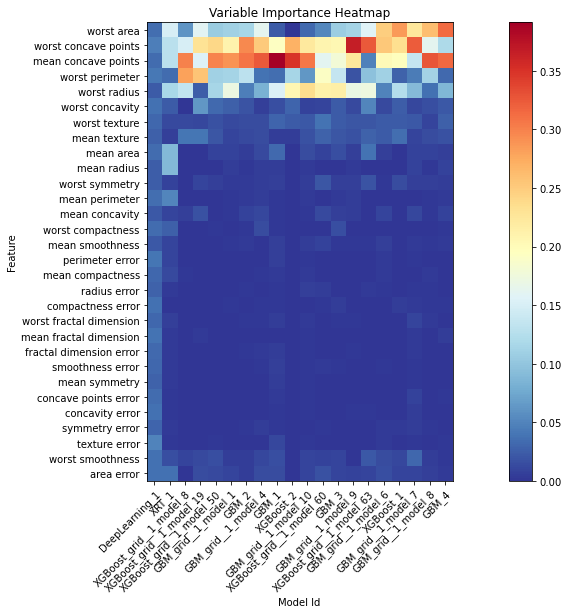

In [43]:
h2o_aml.varimp_heatmap();

## 32. Get model correlations
The `correlation of predictions` from various models on validation data can be plotted.

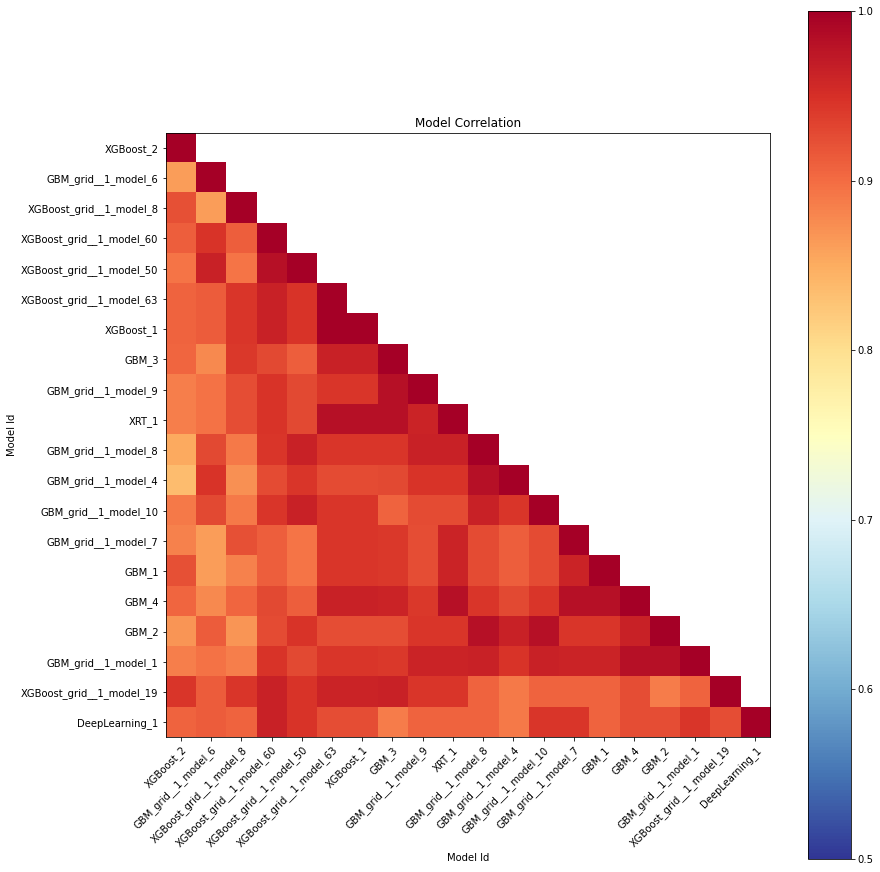

In [44]:
h2o_aml.model_correlation_heatmap(h2o_valid);

## 33. Get SHAP Summary
The `SHAP contribution` of each feature over all observations of validation data from a single model can be plotted.

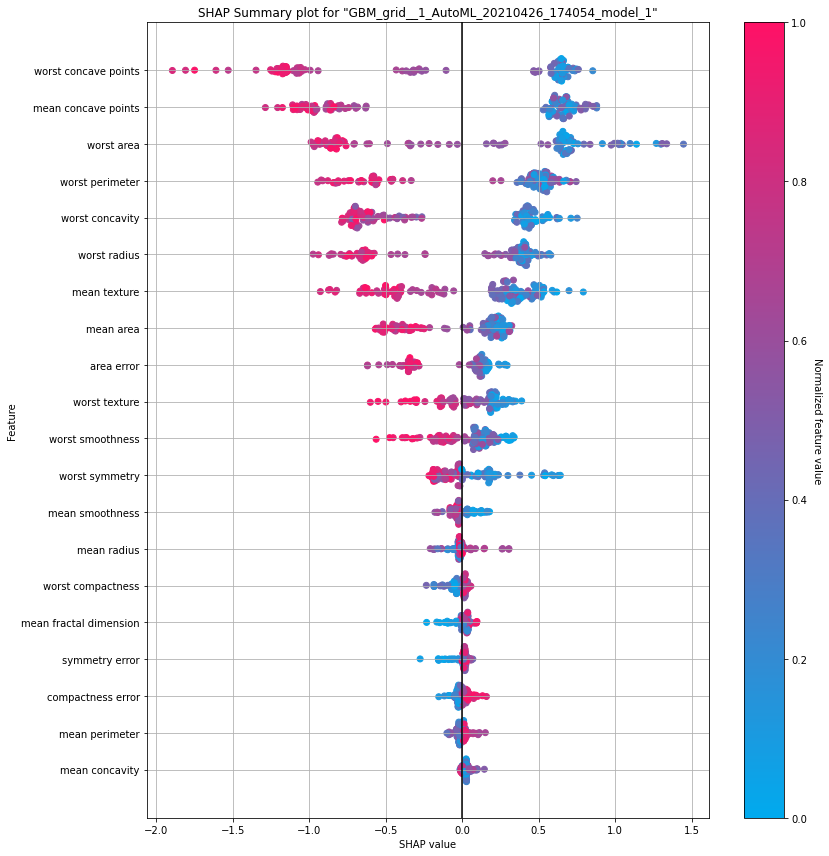

In [45]:
h2o_aml.leader.shap_summary_plot(h2o_valid);

## 34. Get SHAP for an observation
The `SHAP contribution` of each feature for a particular `observation` of validation data from a single model can be plotted.

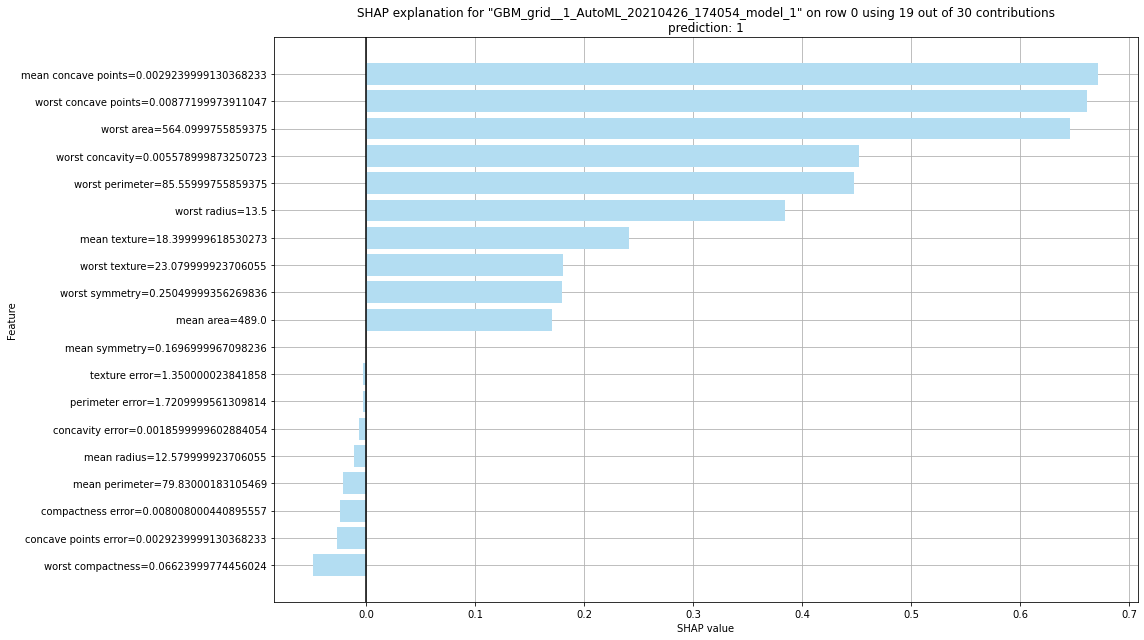

In [46]:
h2o_aml.leader.shap_explain_row_plot(h2o_valid, row_index=0);

## 35. Get Partial Dependency Plots (PDP)
The `Partial Dependency Plots (PDP)` of each feature can be generated for all models, for each model as well as for each model and observation.

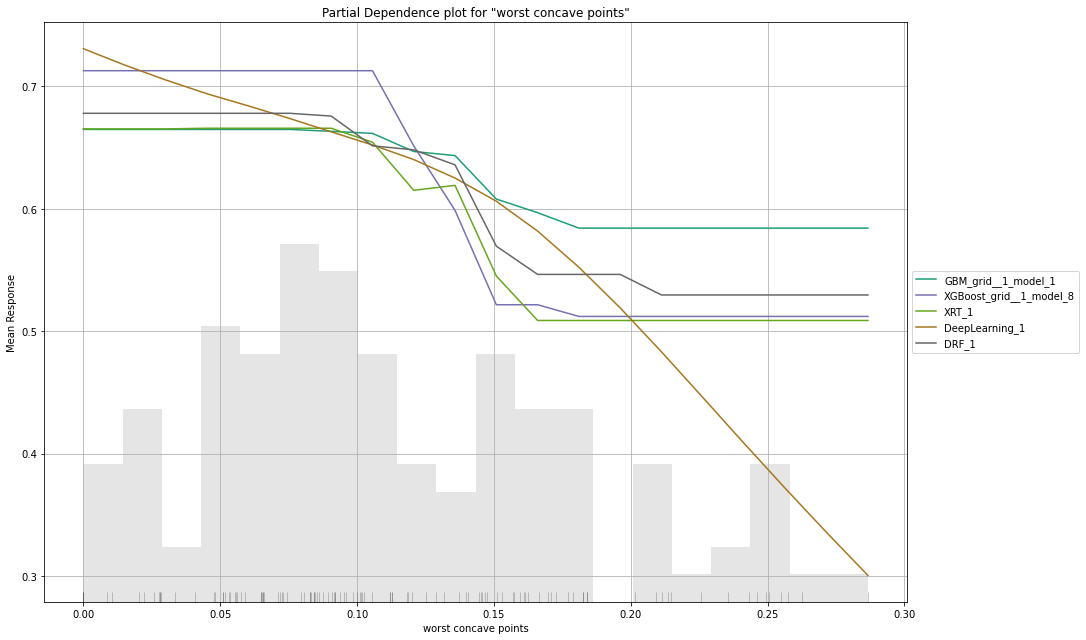

In [47]:
# pdp all models
h2o_aml.pd_multi_plot(h2o_valid, column='worst concave points');

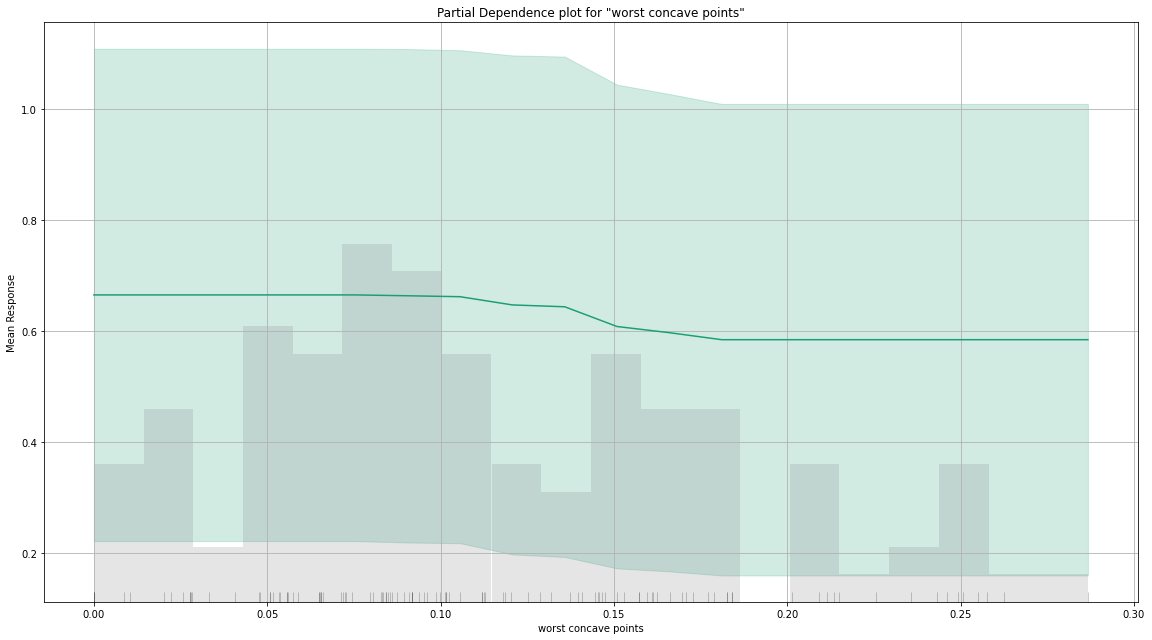

In [48]:
# pdp single model
h2o_aml.leader.pd_plot(h2o_valid, column='worst concave points');

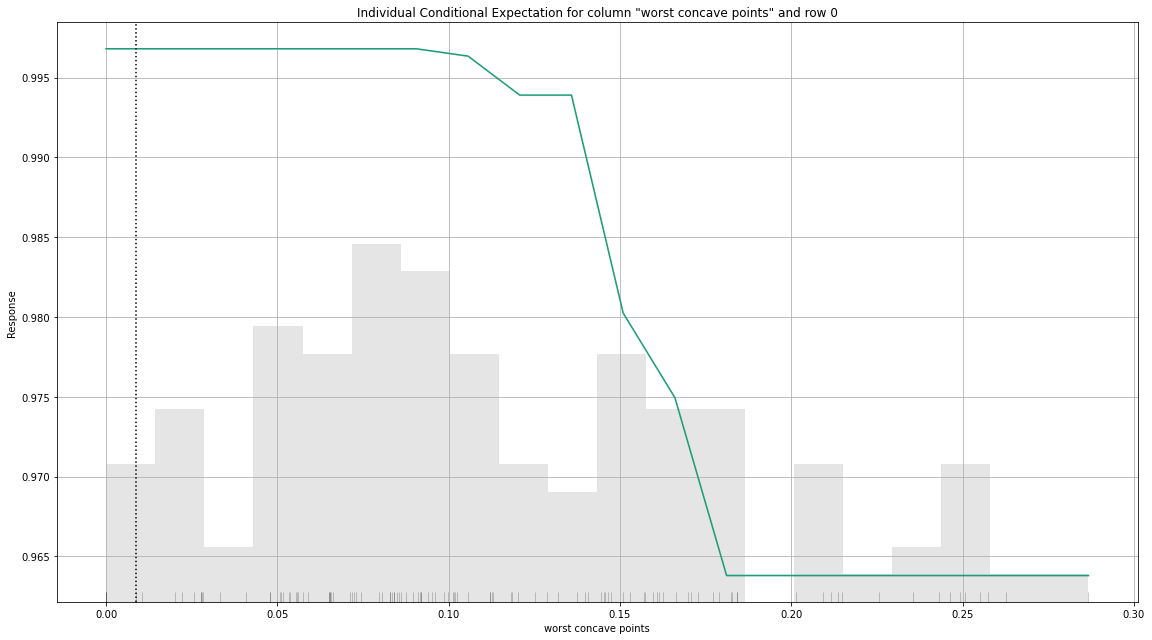

In [49]:
# pdp single model and single observation
h2o_aml.leader.pd_plot(h2o_valid, column='worst concave points', row_index=0);

## 36. Get Individual Conditional Expectation plots (ICE)
The `Individual Conditional Expectation (ICE)` plots of each model can be generated.

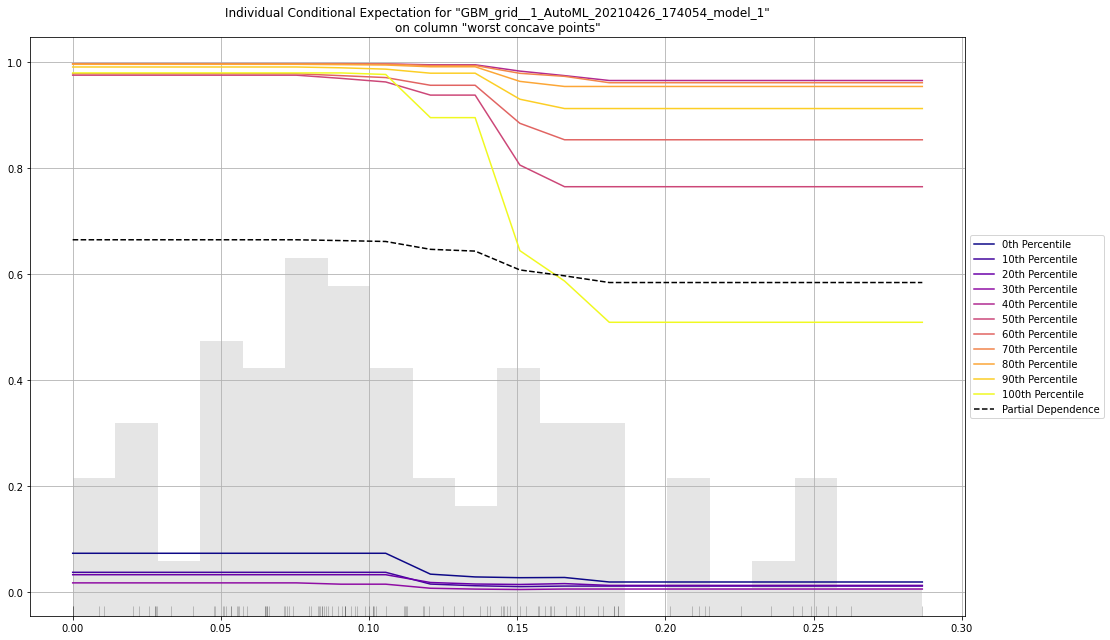

In [50]:
h2o_aml.leader.ice_plot(h2o_valid, column='worst concave points');

## 37. Explain a model
All the above interpretability features can be generated together.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid__1_AutoML_20210426_174054_model_1,1,0.108454,1,0,0.184185,0.0339241,159,0.563251,GBM
GBM_2_AutoML_20210426_174054,1,0.114413,1,0,0.196845,0.0387481,653,0.396458,GBM
GBM_grid__1_AutoML_20210426_174054_model_10,1,0.10739,1,0,0.188089,0.0353775,212,0.394394,GBM
XGBoost_grid__1_AutoML_20210426_174054_model_8,1,0.1787,1,0,0.214836,0.0461543,181,0.302876,XGBoost
XRT_1_AutoML_20210426_174054,0.998051,0.141577,0.998653,0.0263158,0.211338,0.0446637,175,0.327969,DRF
DeepLearning_1_AutoML_20210426_174054,0.998051,0.084015,0.998653,0.0263158,0.169487,0.0287257,74,0.373937,DeepLearning
XGBoost_1_AutoML_20210426_174054,0.998051,0.109957,0.998653,0.0263158,0.165726,0.0274651,314,0.380859,XGBoost
GBM_grid__1_AutoML_20210426_174054_model_7,0.998051,0.137497,0.998653,0.0263158,0.214916,0.0461891,740,0.50633,GBM
XGBoost_grid__1_AutoML_20210426_174054_model_19,0.998051,0.122585,0.998653,0.0263158,0.180602,0.0326169,245,0.358075,XGBoost
GBM_4_AutoML_20210426_174054,0.998051,0.0918546,0.998653,0.0263158,0.158746,0.0252001,249,0.332576,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

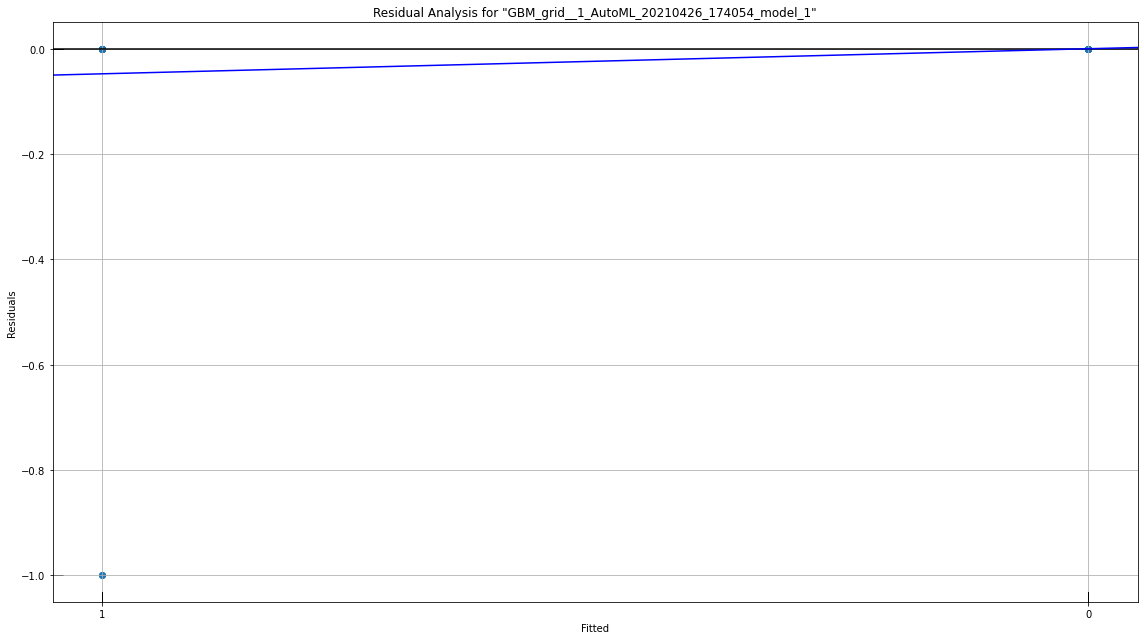

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

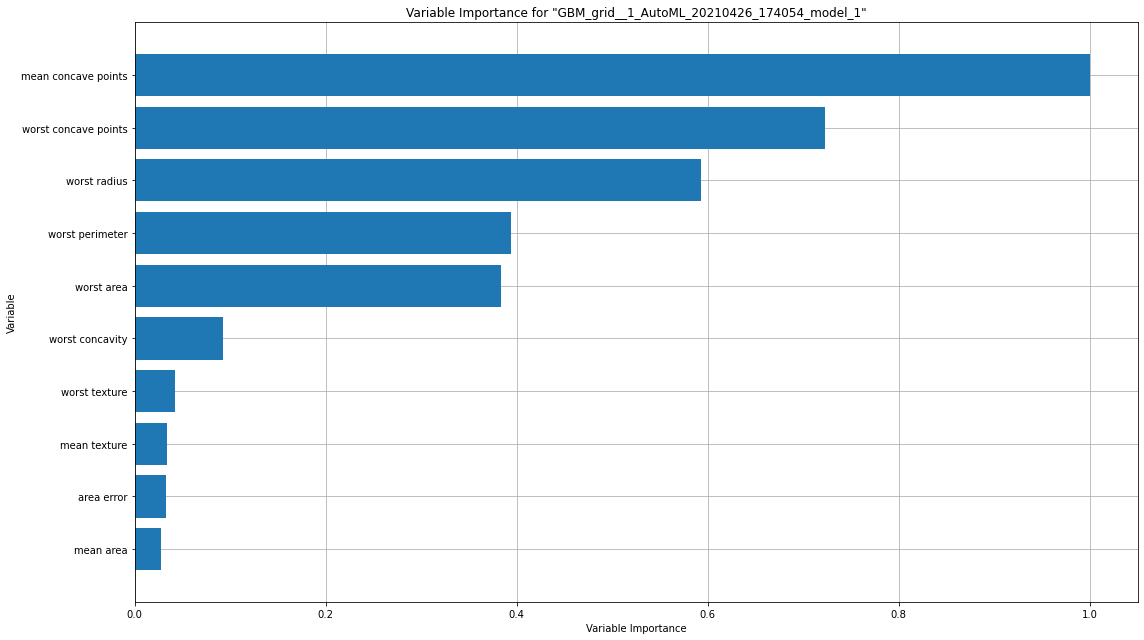

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

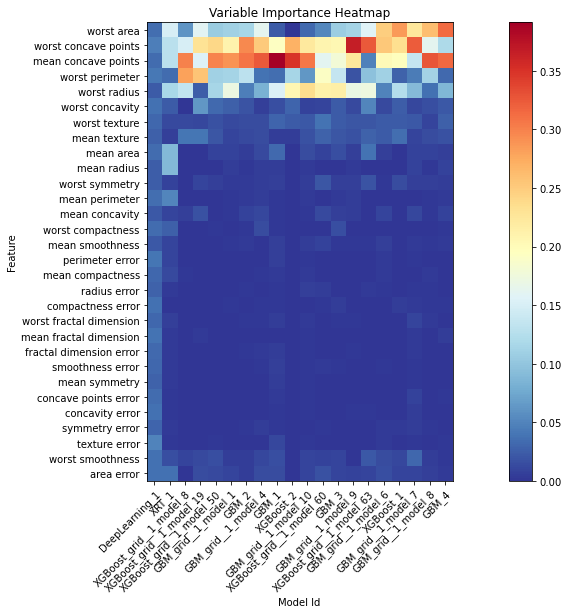

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

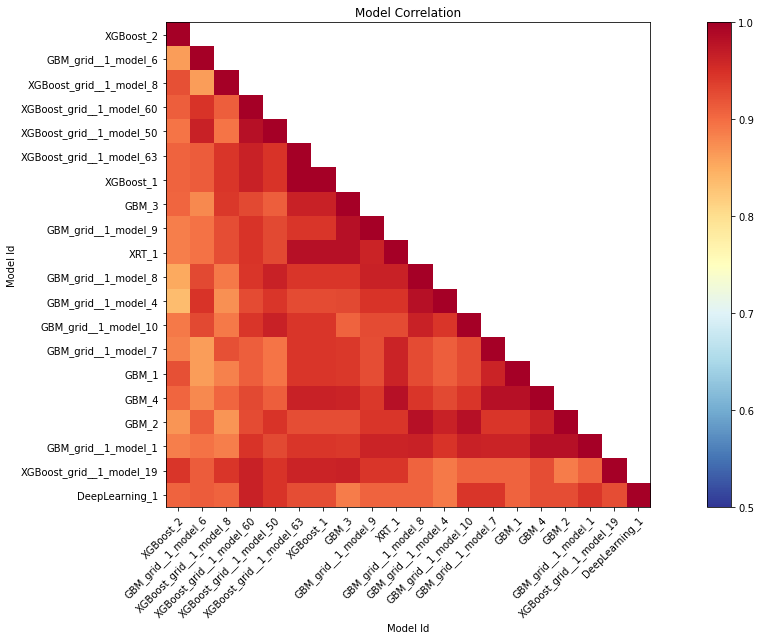

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

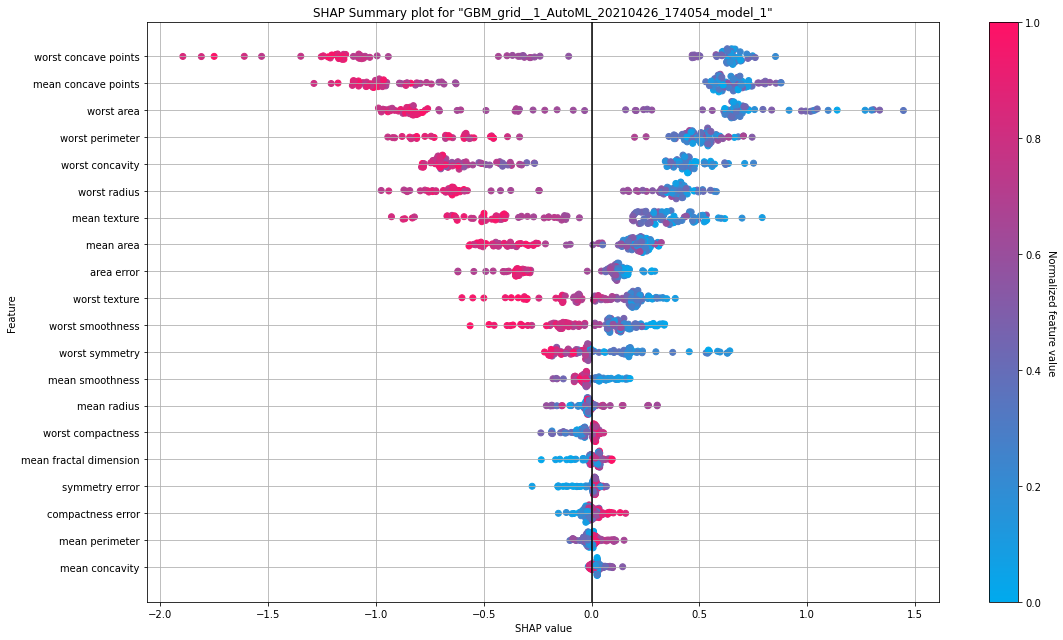

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

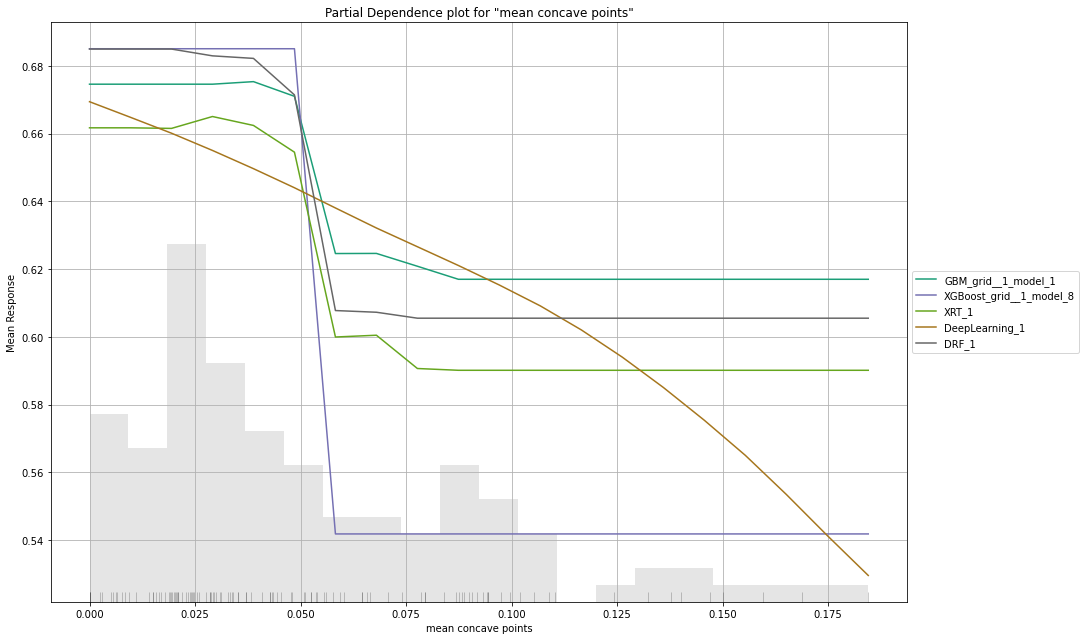

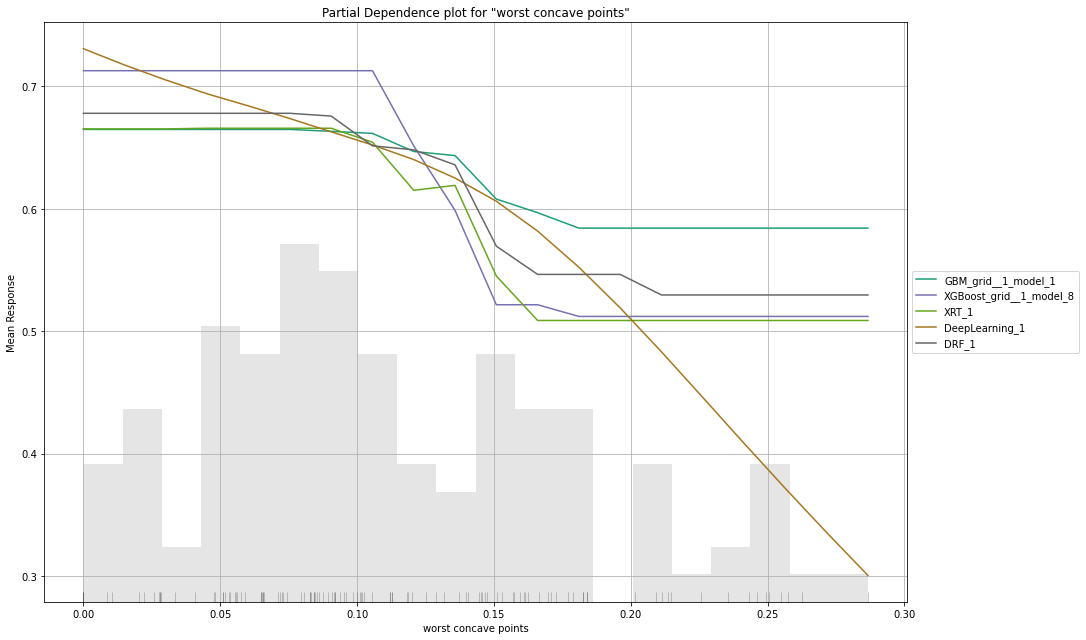

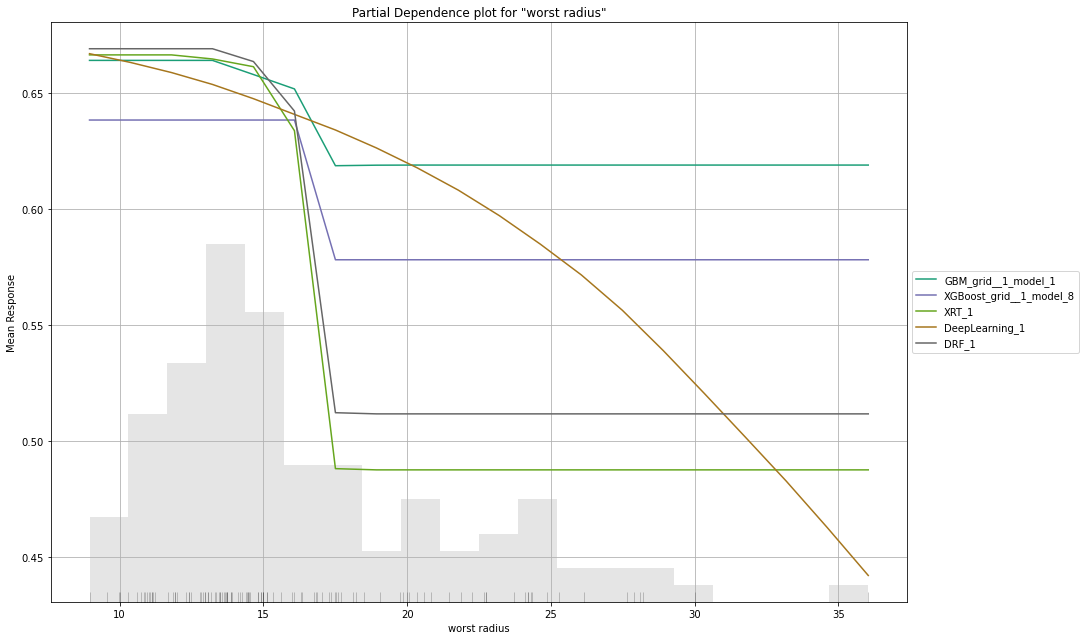

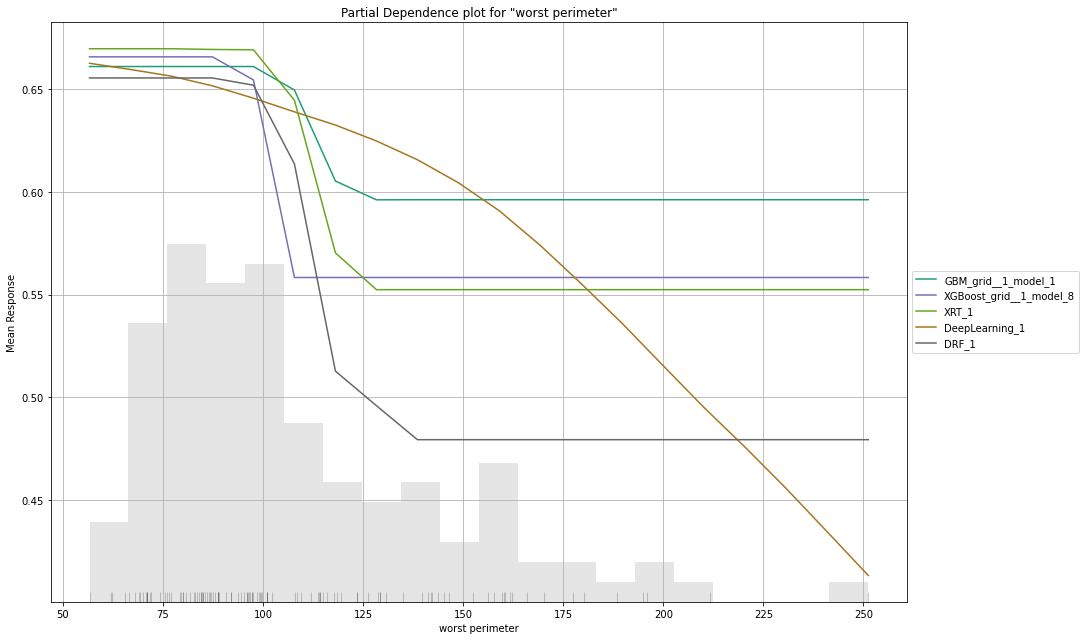

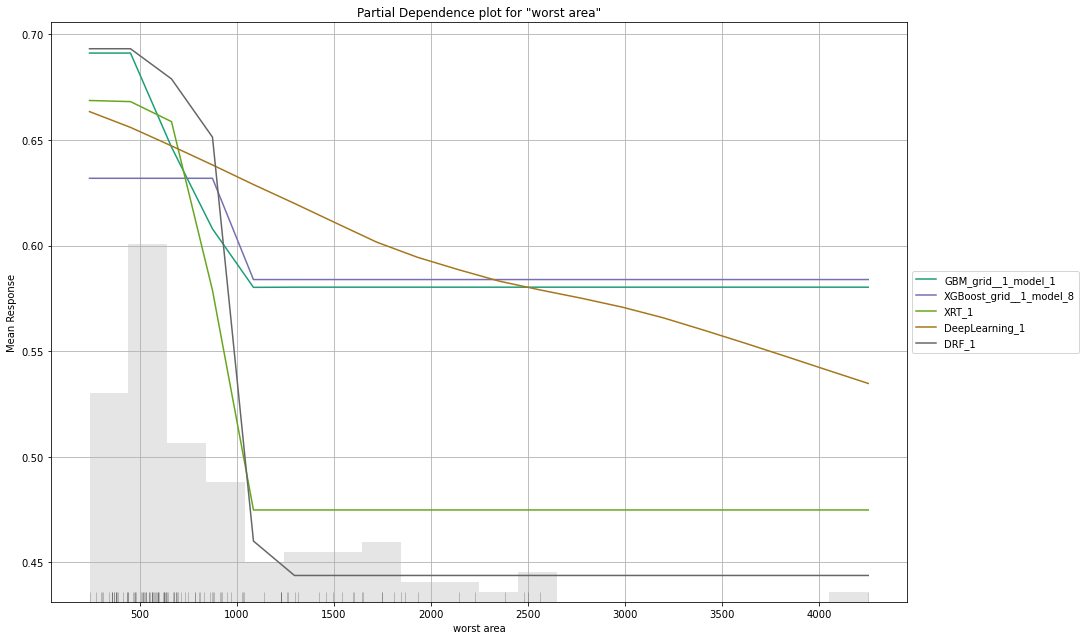

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

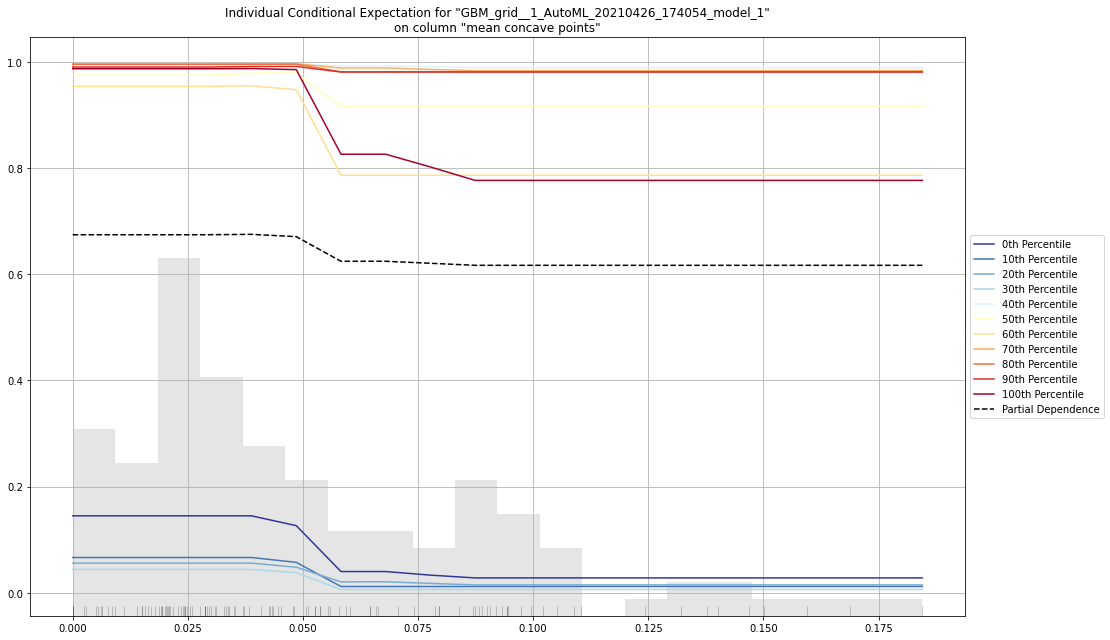

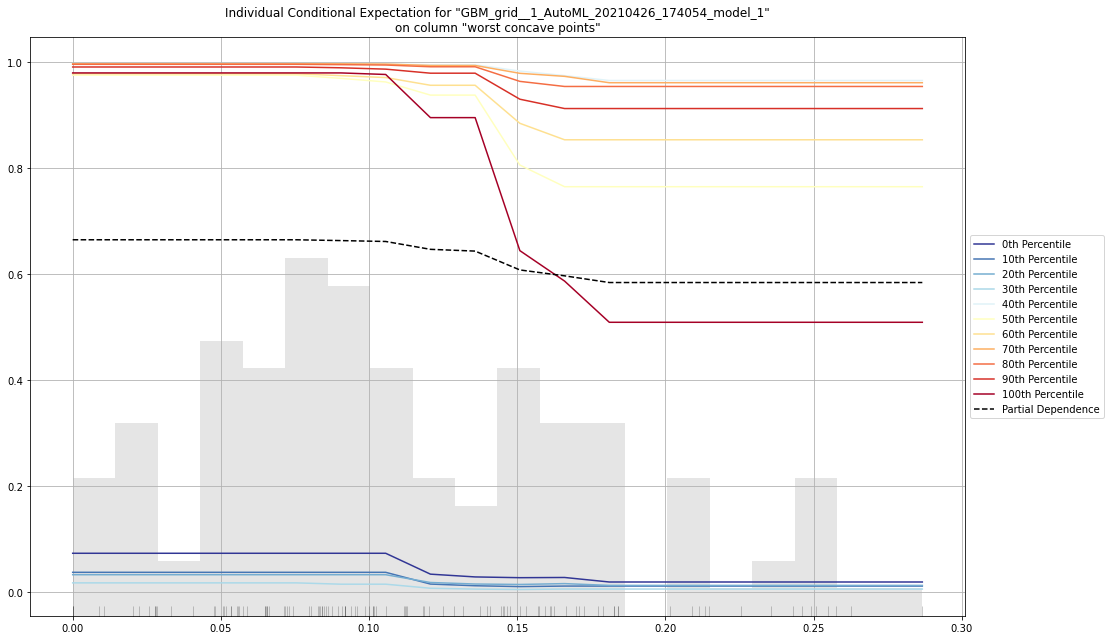

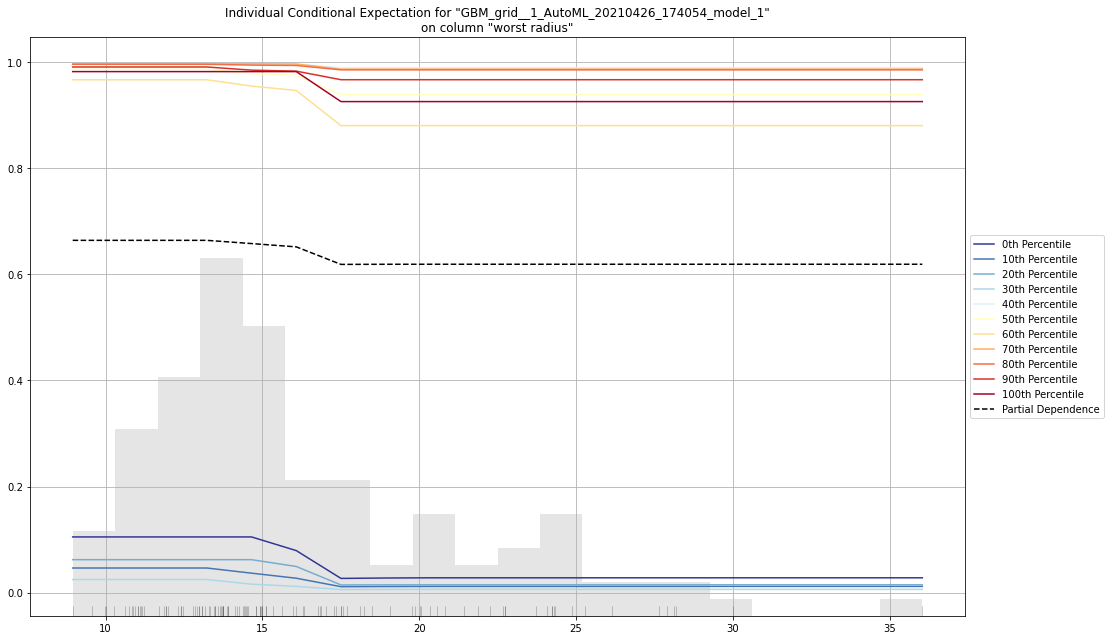

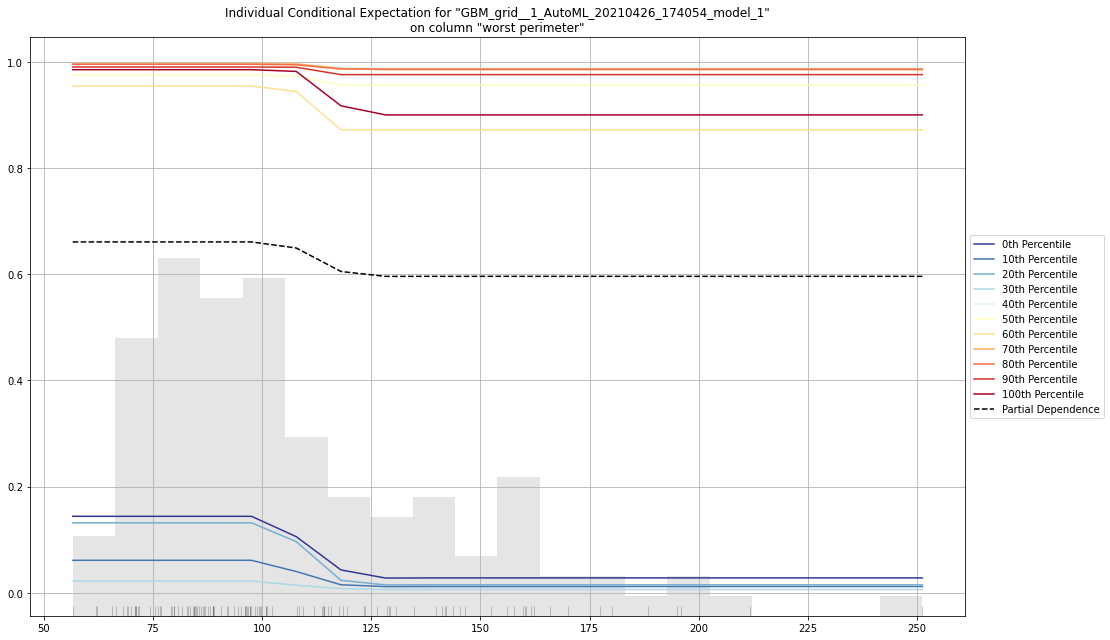

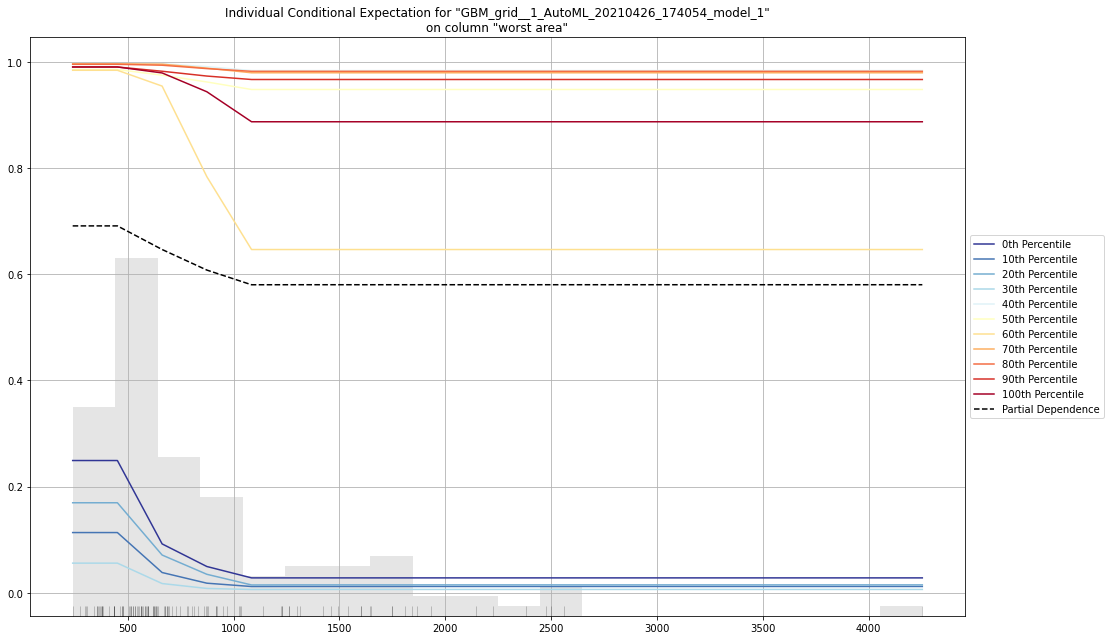

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid__1_AutoML_20210426_174054_model_1,1,0.108454,1,0,0.184185,0.0339241,159,0.563251,GBM
GBM_2_AutoML_20210426_174054,1,0.114413,1,0,0.196845,0.0387481,653,0.396458,GBM
GBM_grid__1_AutoML_20210426_174054_model_10,1,0.10739,1,0,0.188089,0.0353775,212,0.394394,GBM
XGBoost_grid__1_AutoML_20210426_174054_model_8,1,0.1787,1,0,0.214836,0.0461543,181,0.302876,XGBoost
XRT_1_AutoML_20210426_174054,0.998051,0.141577,0.998653,0.0263158,0.211338,0.0446637,175,0.327969,DRF
DeepLearning_1_AutoML_20210426_174054,0.998051,0.084015,0.998653,0.0263158,0.169487,0.0287257,74,0.373937,DeepLearning
XGBoost_1_AutoML_20210426_174054,0.998051,0.109957,0.998653,0.0263158,0.165726,0.0274651,314,0.380859,XGBoost
GBM_grid__1_AutoML_20210426_174054_model_7,0.998051,0.137497,0.998653,0.0263158,0.214916,0.0461891,740,0.50633,GBM
XGBoost_grid__1_AutoML_20210426_174054_model_19,0.998051,0.122585,0.998653,0.0263158,0.180602,0.0326169,245,0.358075,XGBoost
GBM_4_AutoML_20210426_174054,0.998051,0.0918546,0.998653,0.0263158,0.158746,0.0252001,249,0.332576,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

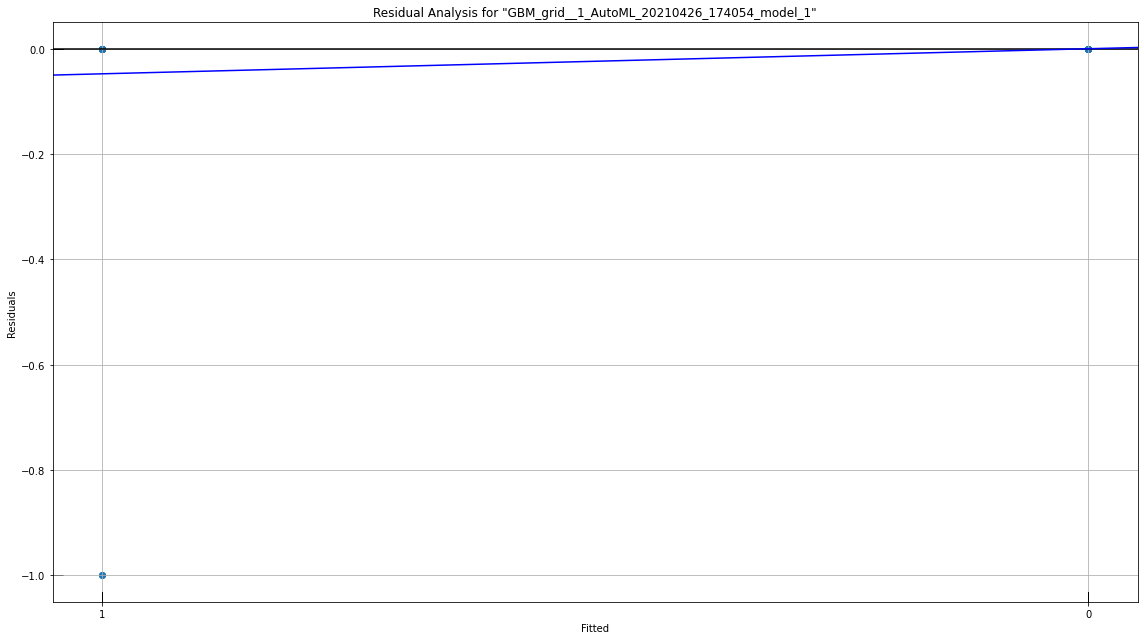

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

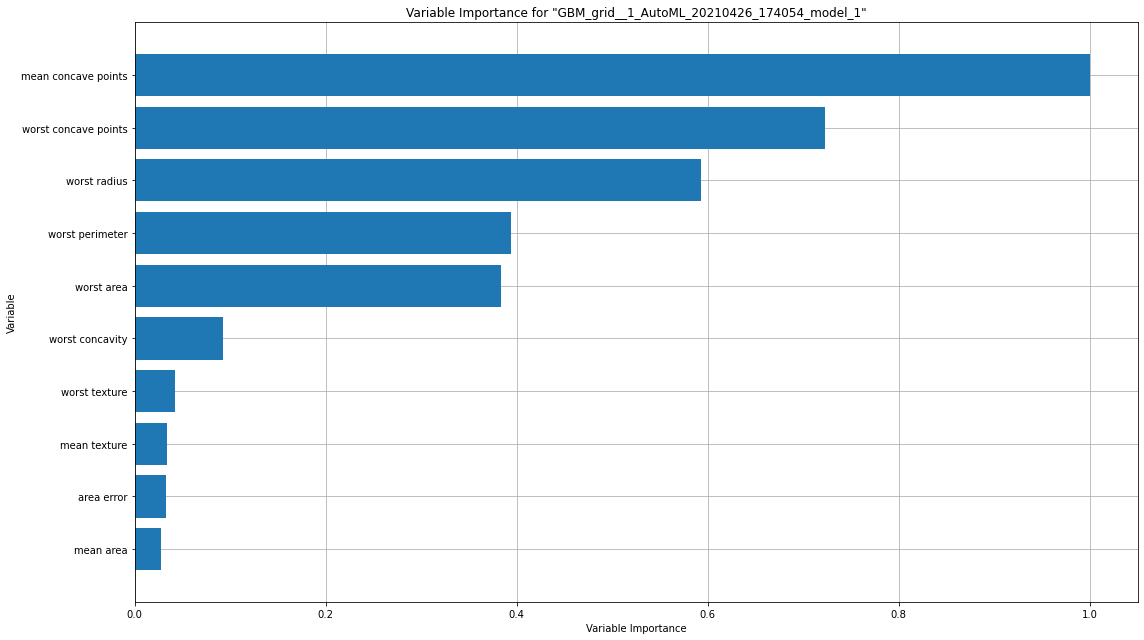

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

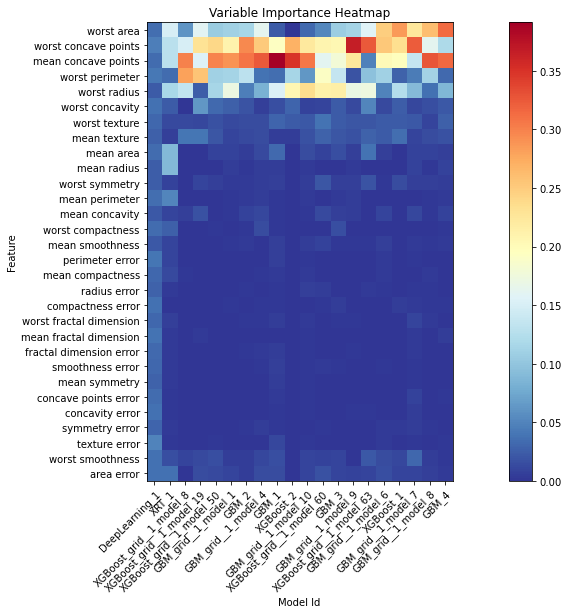

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

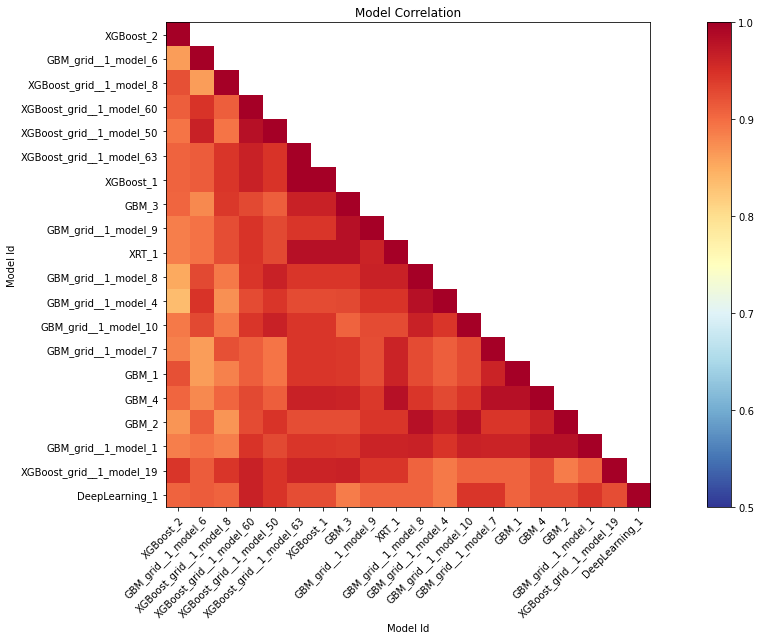

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

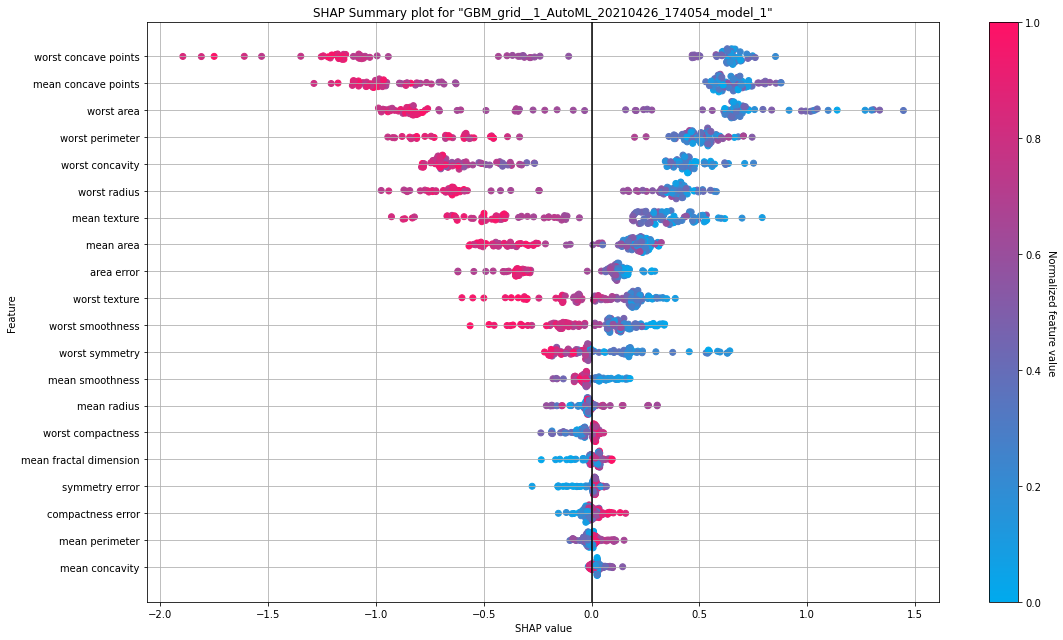

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

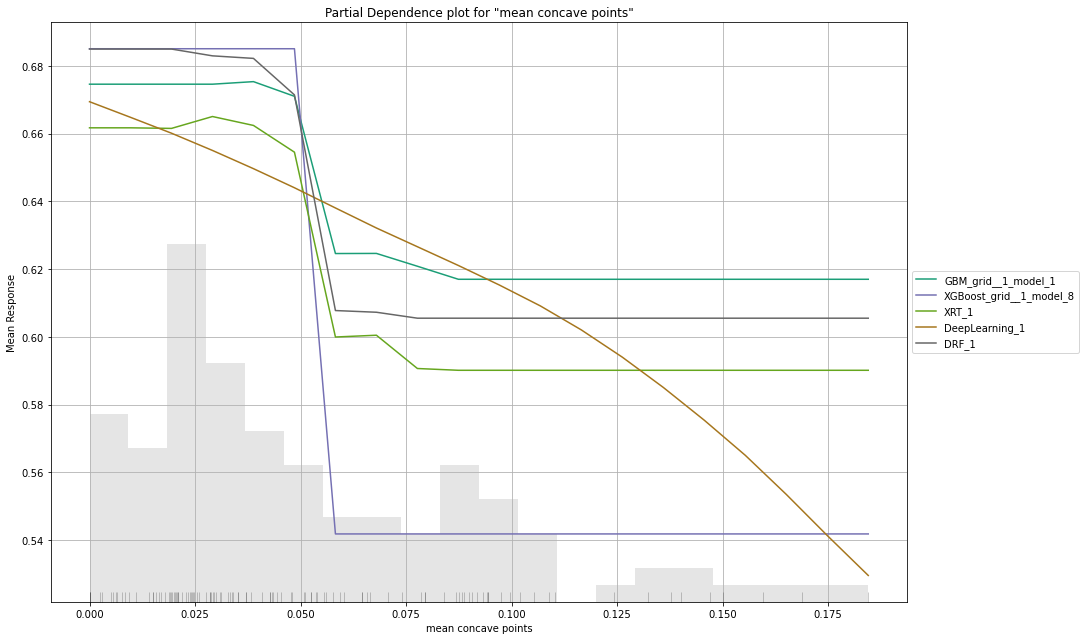

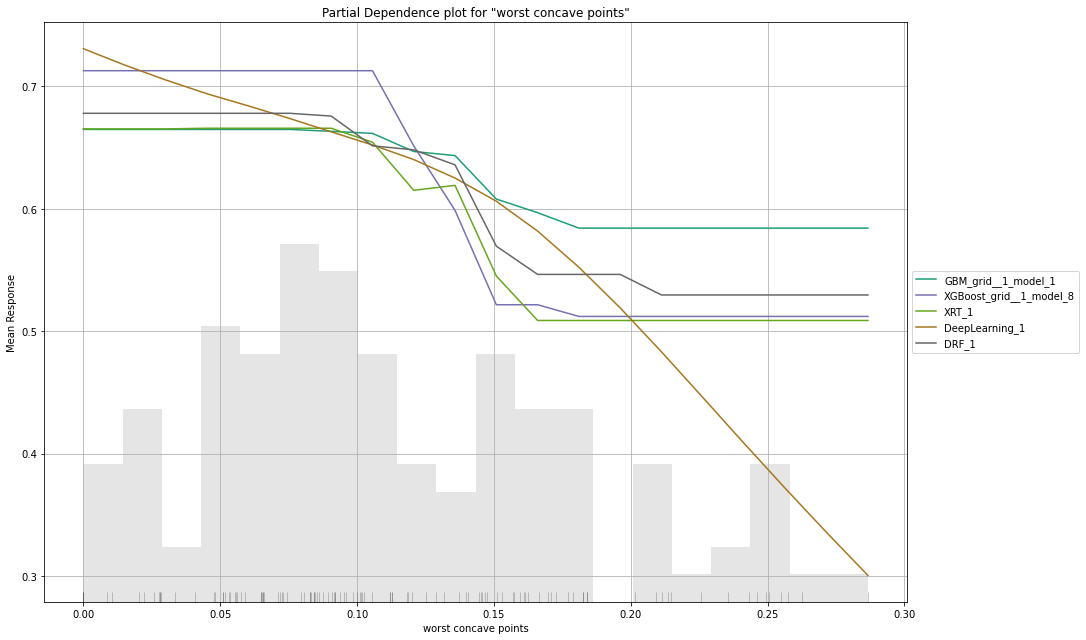

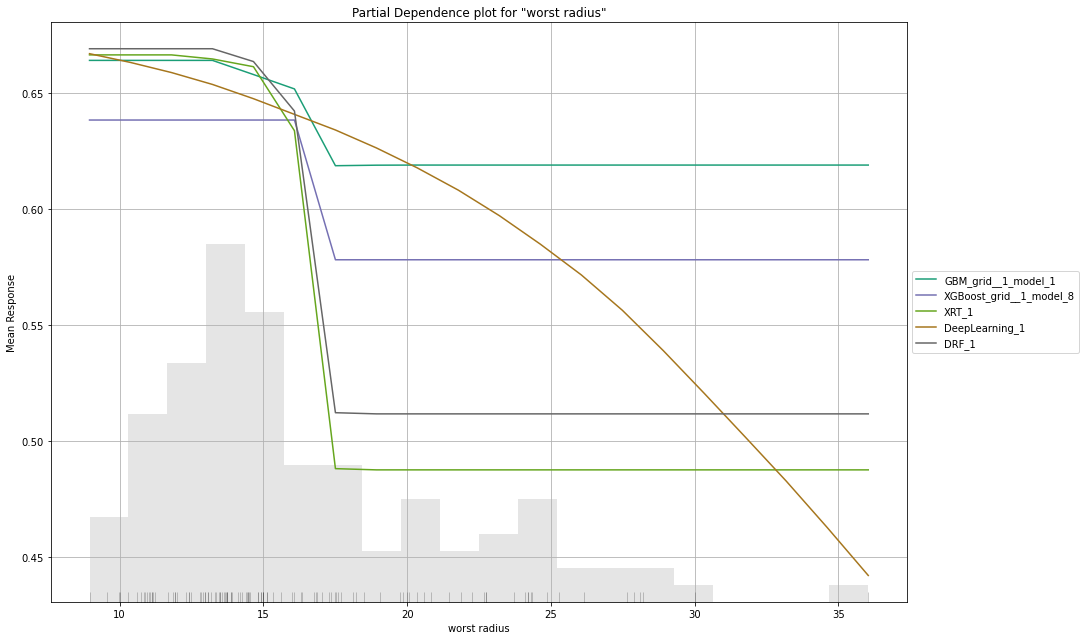

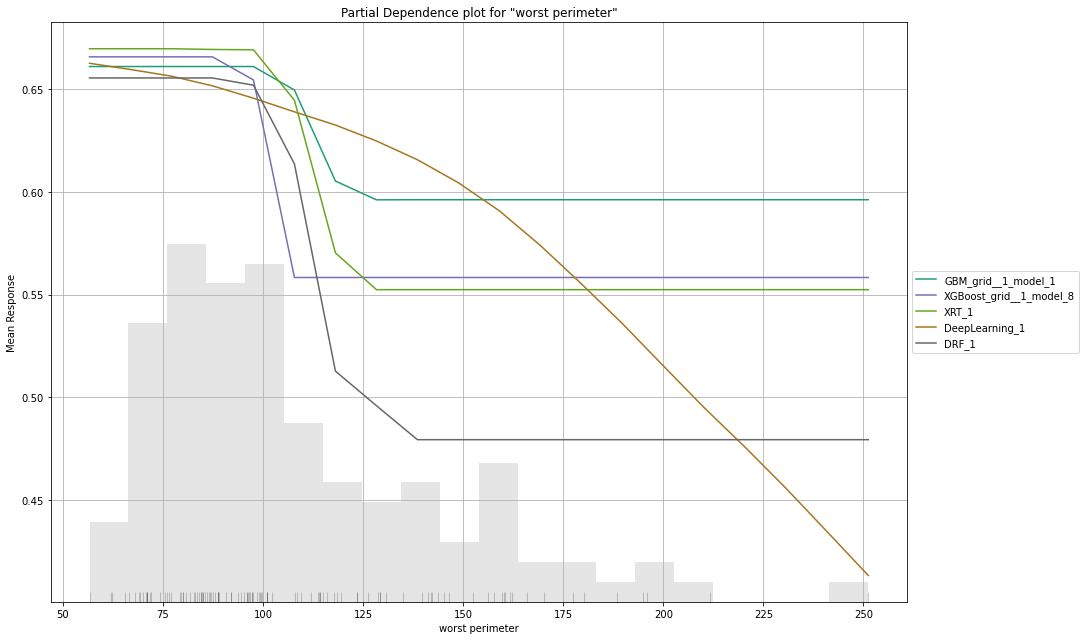

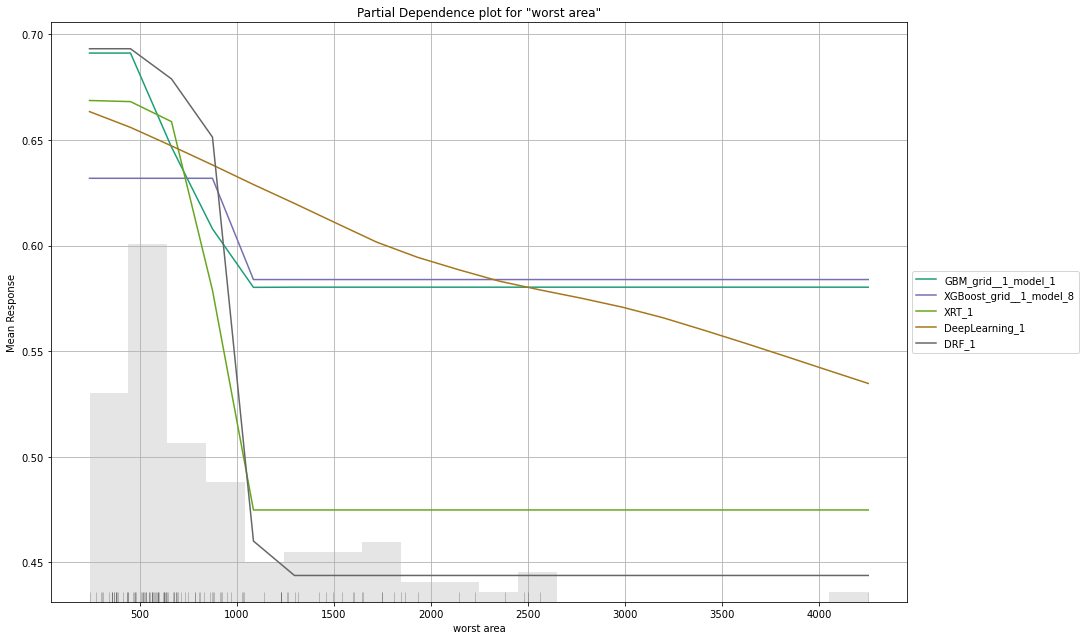

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

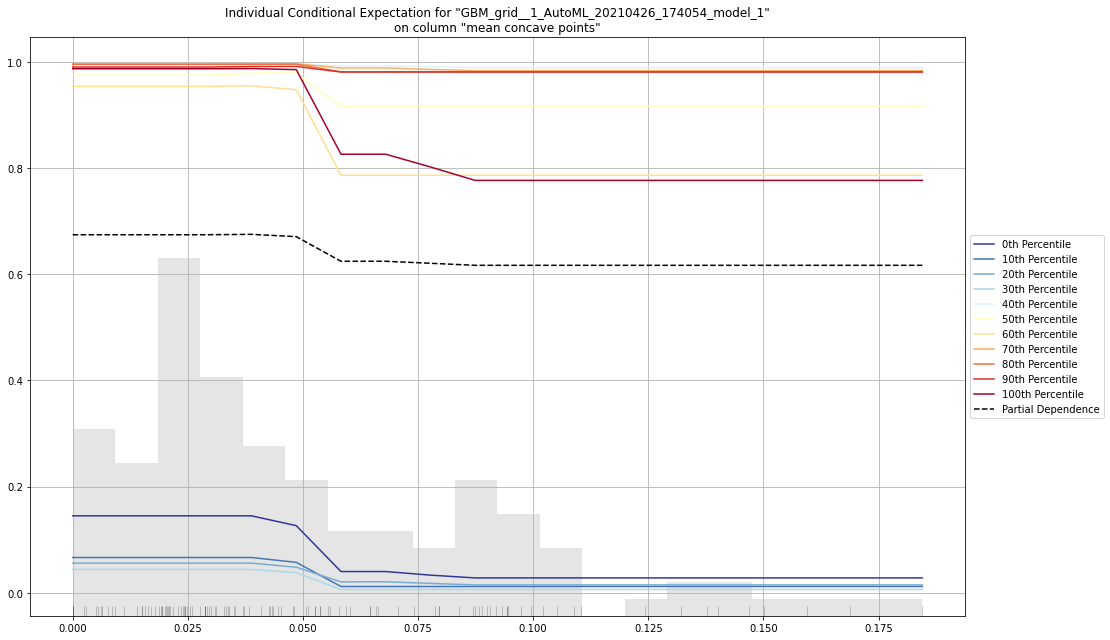

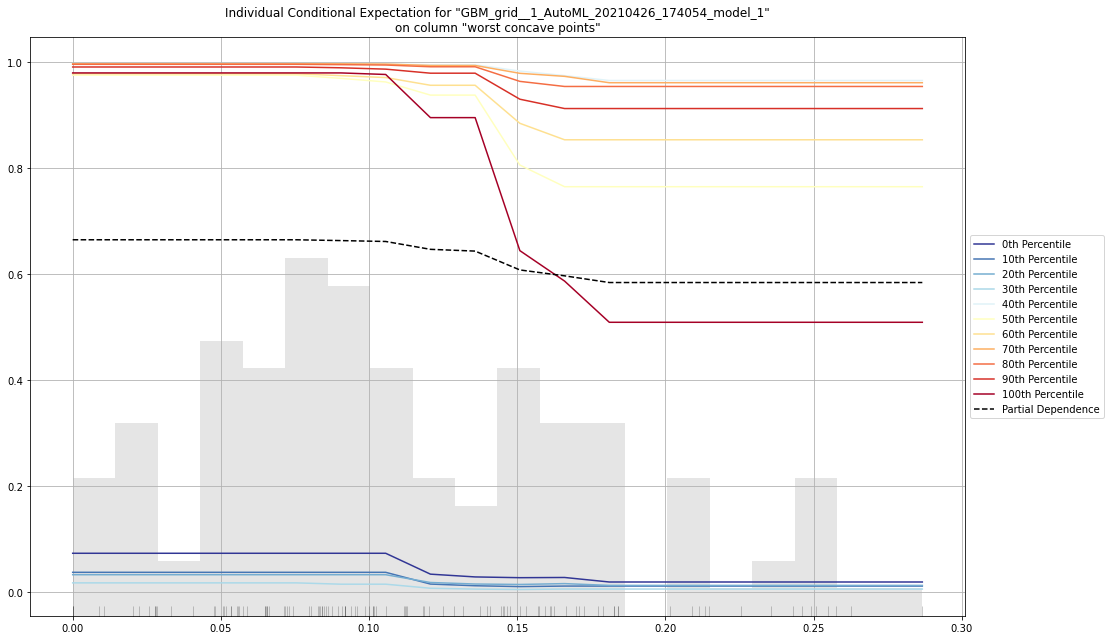

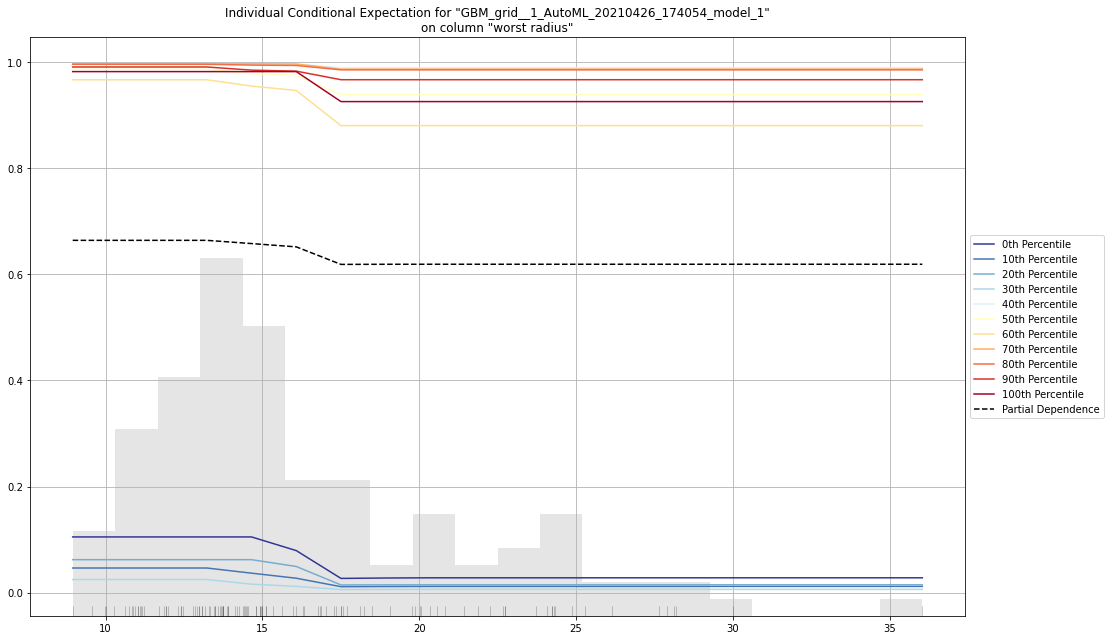

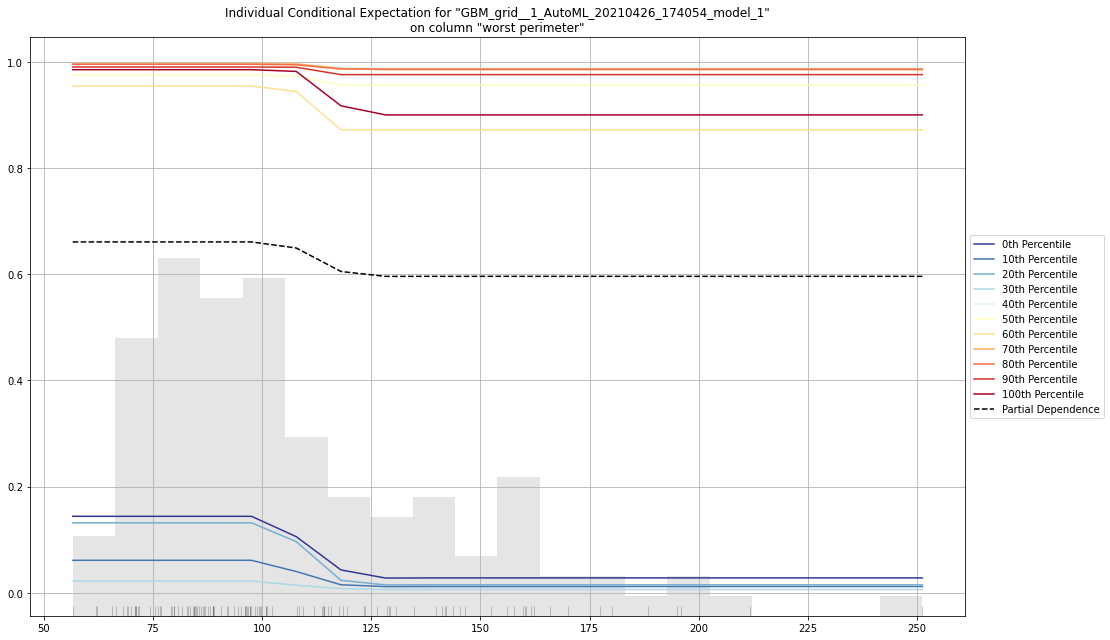

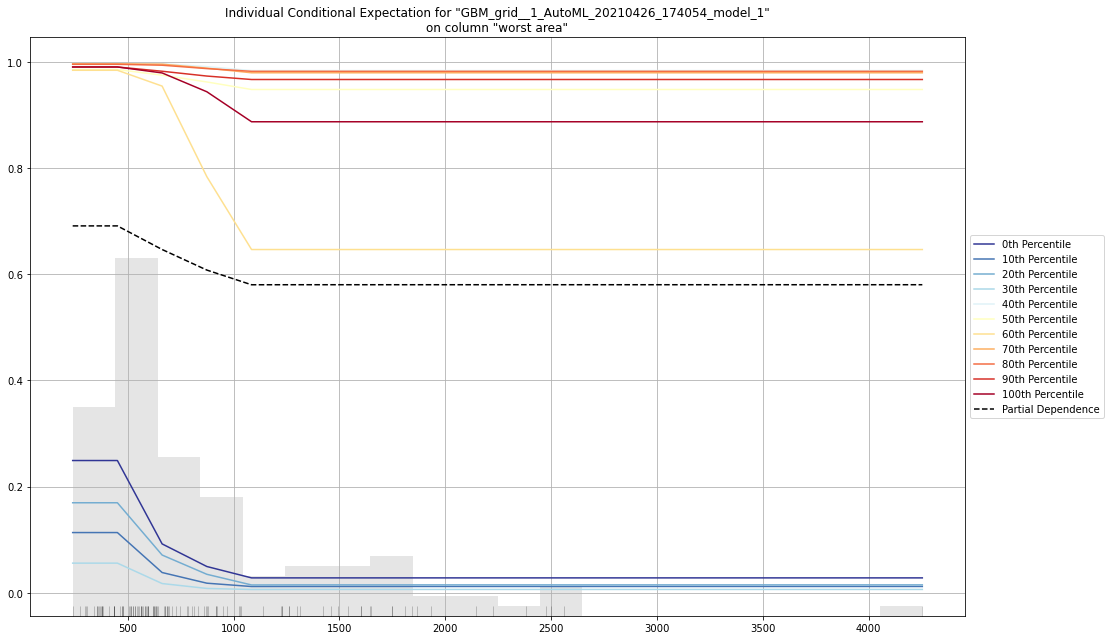

In [51]:
h2o.explain(h2o_aml, h2o_valid)

## 38. Save model as binary
An H2O model can be saved as a `binary` artifact.

In [ ]:
PATH_OUTPUT = '.'
h2o.save_model(h2o_aml.leader, path = PATH_OUTPUT)

## 39. Save model as mojo
An H2O model can be saved as a `mojo` artifact which is recommended for production.

In [ ]:
PATH_OUTPUT = './'
h2o_aml.leader.download_mojo(path = PATH_OUTPUT)

## 40. Check logs
The logs of H2OAutoML can be extracted using `event_log`.

In [54]:
h2o_aml.event_log.head(rows=h2o_aml.event_log.nrows)

timestamp,level,stage,message,name,value
17:40:54.750,Info,Workflow,Project: AutoML_20210426_174054749,,
17:40:54.750,Info,Validation,Cross-validation disabled by user: no fold column nor nfolds > 1.,,
17:40:54.750,Info,Validation,Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954,,
17:40:54.750,Info,Validation,Build control seed: -1 (random),,
17:40:54.750,Info,DataImport,"Since cross-validation is disabled, and none of validation frame and leaderboard frame were provided, automatically split the training data into training, validation and leaderboard frames in the ratio 80/10/10",,
17:40:54.767,Info,DataImport,training frame: Frame key: automl_training_py_1162_sid_8004 cols: 31 rows: 366 chunks: 1 size: 90548 checksum: 7196620539661792940,,
17:40:54.768,Info,DataImport,validation frame: Frame key: automl_validation_py_1162_sid_8004 cols: 31 rows: 43 chunks: 1 size: 12988 checksum: -7324433221640276926,,
17:40:54.768,Info,DataImport,leaderboard frame: Frame key: automl_leaderboard_py_1162_sid_8004 cols: 31 rows: 46 chunks: 1 size: 13708 checksum: -1689355368270709610,,
17:40:54.769,Info,DataImport,blending frame: NULL,,
17:40:54.769,Info,DataImport,response column: target,,


## 41. Don't stop learning
Here are some useful resources to explore and learn more:

* [Implementation on Kaggle TPS (January 2021) competition (Regression)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-january-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (February 2021) competition (Regression)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-february-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (March 2021) competition (Binary Classification)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-march-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (April 2021) competition (Binary Classification)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-april-2021#H2O-AutoML)


* [Product Website](https://www.h2o.ai/products/h2o-automl)
* [Source Code](https://github.com/h2oai/h2o-3)
* [Documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)